In [1]:
import numpy as np                # Necessary libraries for data manipulation and visualisation
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
oil_prices = pd.read_csv('oil_prices_eu.csv')   # Bringing in the raw data

In [3]:
oil_prices.head(10)

,DATE,DCOILBRENTEU
0,20/05/1987,18.63
1,21/05/1987,18.45
2,22/05/1987,18.55
3,25/05/1987,18.6
4,26/05/1987,18.63
5,27/05/1987,18.6
6,28/05/1987,18.6
7,29/05/1987,18.58
8,01/06/1987,18.65
9,02/06/1987,18.68


In [4]:
oil_prices.info()       # Checking number of observations, missing values and datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9704 entries, 0 to 9703
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   DATE          9704 non-null   object
 1   DCOILBRENTEU  9704 non-null   object
dtypes: object(2)
memory usage: 151.8+ KB


In [5]:
oil_prices.describe()

,DATE,DCOILBRENTEU
count,9704,9704
unique,9704,5284
top,20/05/1987,.
freq,1,266


In [6]:
oil_prices.shape   # Checking dataframe shape

(9704, 2)

In [7]:
oil_prices.isna().sum()     # Checking for NaN values

DATE            0
DCOILBRENTEU    0
dtype: int64

In [8]:
oil_prices['year'] = oil_prices['DATE'].str[-4:]  # Extracting the year in order to isolate for missing dates

oil_prices.head(5)

,DATE,DCOILBRENTEU,year
0,20/05/1987,18.63,1987
1,21/05/1987,18.45,1987
2,22/05/1987,18.55,1987
3,25/05/1987,18.6,1987
4,26/05/1987,18.63,1987


In [9]:
oil_prices.insert(1, 'year', oil_prices.pop('year'))     # Moving 'year' column to the left of target variable

oil_prices.head(5)

,DATE,year,DCOILBRENTEU
0,20/05/1987,1987,18.63
1,21/05/1987,1987,18.45
2,22/05/1987,1987,18.55
3,25/05/1987,1987,18.6
4,26/05/1987,1987,18.63


In [10]:
oil_prices['year'].value_counts().sort_index()         # Inspecting whether equal number of observations per year

1987    162
1988    261
1989    260
1990    261
1991    261
1992    262
1993    261
1994    260
1995    260
1996    262
1997    261
1998    261
1999    261
2000    260
2001    261
2002    261
2003    261
2004    262
2005    260
2006    260
2007    261
2008    262
2009    261
2010    261
2011    260
2012    261
2013    261
2014    261
2015    261
2016    261
2017    260
2018    261
2019    261
2020    262
2021    261
2022    260
2023    260
2024    151
Name: year, dtype: int64

In [11]:
oil_prices = oil_prices[~((oil_prices['year'] == '1987') | (oil_prices['year'] == '2024'))].reset_index(drop = True) 

# Removing years with missing data

oil_prices['year'].value_counts().sort_index()  # Checking requested years are removed

1988    261
1989    260
1990    261
1991    261
1992    262
1993    261
1994    260
1995    260
1996    262
1997    261
1998    261
1999    261
2000    260
2001    261
2002    261
2003    261
2004    262
2005    260
2006    260
2007    261
2008    262
2009    261
2010    261
2011    260
2012    261
2013    261
2014    261
2015    261
2016    261
2017    260
2018    261
2019    261
2020    262
2021    261
2022    260
2023    260
Name: year, dtype: int64

In [12]:
oil_prices['month'] = oil_prices['DATE'].str[3:5]     # Extracting the month number in order to isolate for missing dates

oil_prices.insert(2, 'month', oil_prices.pop('month'))     # Moving 'month' column to the left of target variable

oil_prices.head(5)

,DATE,year,month,DCOILBRENTEU
0,01/01/1988,1988,01,.
1,04/01/1988,1988,01,17.95
2,05/01/1988,1988,01,17.08
3,06/01/1988,1988,01,17.9
4,07/01/1988,1988,01,.


In [13]:
oil_prices['month'].value_counts().sort_index()         # Inspecting whether equal number of observations per month

01    796
02    726
03    800
04    769
05    798
06    773
07    794
08    800
09    771
10    795
11    774
12    795
Name: month, dtype: int64

In [14]:
oil_prices['DATE'] = pd.to_datetime(oil_prices['DATE'], format = '%d/%m/%Y')    # Converting 'DATE' column to datetime format

oil_prices['day'] = oil_prices['DATE'].dt.day_name()   # Extracting the 'day' name in order to isolate for missing dates

oil_prices.insert(3, 'day', oil_prices.pop('day'))     # Moving 'day' column to the left of target variable

oil_prices.head(5)         # Appears to be some observations with no numeric value input for 'DCOILBRENTEU' column

,DATE,year,month,day,DCOILBRENTEU
0,1988-01-01,1988,01,Friday,.
1,1988-01-04,1988,01,Monday,17.95
2,1988-01-05,1988,01,Tuesday,17.08
3,1988-01-06,1988,01,Wednesday,17.9
4,1988-01-07,1988,01,Thursday,.


In [15]:
oil_prices['day'].value_counts().sort_index()           # Inspecting whether equal number of observations per day of week


# Confirmed days are all weekdays only and roughly same amount per day (can account for leapyears/public holidays etc.)

Friday       1879
Monday       1878
Thursday     1878
Tuesday      1878
Wednesday    1878
Name: day, dtype: int64

In [16]:
oil_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9391 entries, 0 to 9390
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   DATE          9391 non-null   datetime64[ns]
 1   year          9391 non-null   object        
 2   month         9391 non-null   object        
 3   day           9391 non-null   object        
 4   DCOILBRENTEU  9391 non-null   object        
dtypes: datetime64[ns](1), object(4)
memory usage: 367.0+ KB


In [17]:
oil_prices['numeric'] = pd.to_numeric(oil_prices['DCOILBRENTEU'], errors = 'coerce')  

# Converting target variable to numeric values

non_numeric = oil_prices[oil_prices['numeric'].isna()]   # Showing NaN's meaning non-numeric values present for target variable

print('non-numeric values is:') # 259 rows with non-numeric value
print(non_numeric)

non-numeric values is:
           DATE  year month       day DCOILBRENTEU  numeric
0    1988-01-01  1988    01    Friday            .      NaN
4    1988-01-07  1988    01  Thursday            .      NaN
17   1988-01-26  1988    01   Tuesday            .      NaN
65   1988-04-01  1988    04    Friday            .      NaN
66   1988-04-04  1988    04    Monday            .      NaN
...         ...   ...   ...       ...          ...      ...
9221 2023-05-08  2023    05    Monday            .      NaN
9236 2023-05-29  2023    05    Monday            .      NaN
9301 2023-08-28  2023    08    Monday            .      NaN
9386 2023-12-25  2023    12    Monday            .      NaN
9387 2023-12-26  2023    12   Tuesday            .      NaN

[259 rows x 6 columns]


In [18]:
oil_prices.insert(4, 'numeric', oil_prices.pop('numeric'))     # Moving 'numeric' column to the left of target variable

oil_prices.head(5)

,DATE,year,month,day,numeric,DCOILBRENTEU
0,1988-01-01,1988,01,Friday,NaN,.
1,1988-01-04,1988,01,Monday,17.95,17.95
2,1988-01-05,1988,01,Tuesday,17.08,17.08
3,1988-01-06,1988,01,Wednesday,17.90,17.9
4,1988-01-07,1988,01,Thursday,NaN,.


In [19]:
mask_nan = oil_prices['numeric'].isna()       # Creating mask for non-numeric values
mask_numeric = ~mask_nan                      # Creating mask for numeric values

In [20]:
oil_prices['DATE'] = pd.to_datetime(oil_prices['DATE'])   # Ensuring 'DATE' column is in datetime format
oil_prices['numeric'] = pd.to_numeric(oil_prices['numeric'], errors = 'coerce') # Ensuring 'numeric' column is in numeric format

In [21]:
print(oil_prices['DATE'][mask_nan])       # Ensuring data is present for mask_nan in 'DATE' and 'numeric' columns
print(oil_prices['numeric'][mask_nan])

0      1988-01-01
4      1988-01-07
17     1988-01-26
65     1988-04-01
66     1988-04-04
          ...    
9221   2023-05-08
9236   2023-05-29
9301   2023-08-28
9386   2023-12-25
9387   2023-12-26
Name: DATE, Length: 259, dtype: datetime64[ns]
0      NaN
4      NaN
17     NaN
65     NaN
66     NaN
        ..
9221   NaN
9236   NaN
9301   NaN
9386   NaN
9387   NaN
Name: numeric, Length: 259, dtype: float64


In [22]:
print(mask_nan)
print(mask_numeric)

0        True
1       False
2       False
3       False
4        True
        ...  
9386     True
9387     True
9388    False
9389    False
9390    False
Name: numeric, Length: 9391, dtype: bool
0       False
1        True
2        True
3        True
4       False
        ...  
9386    False
9387    False
9388     True
9389     True
9390     True
Name: numeric, Length: 9391, dtype: bool


In [23]:
#import matplotlib.dates as mdates

#plt.figure(figsize = (10, 6))

#plt.plot(oil_prices['DATE'][mask_nan], oil_prices['numeric'][mask_nan], 'ro', label = 'NaN')
#plt.plot(oil_prices['DATE'][mask_numeric], oil_prices['numeric'][mask_numeric], 'b-', label = 'Numeric')

#plt.xlim(oil_prices['DATE'].min(), oil_prices['DATE'].max())
#plt.ylim(oil_prices['numeric'].min() - 10, oil_prices['numeric'].max() + 10)

#plt.xlabel('DATE')
#plt.ylabel('Value')
#plt.title('Non-Numeric values plotted as NaN')

#plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%Y'))

#plt.gcf().autofmt_xdate()

#plt.legend()

#plt.show()

In [24]:
#print(plt.ylim())

In [25]:
NaN = oil_prices.isna().sum()    # Identifying where NaN values are

print(NaN)

DATE              0
year              0
month             0
day               0
numeric         259
DCOILBRENTEU      0
dtype: int64


In [26]:
#plt.figure(figsize = (10, 6))
#sns.heatmap(oil_prices.isnull(), cbar = False, cmap = "viridis")

#plt.title("Heatmap of NaN Values")          # Displaying NaN values in heatmap

#plt.show()


In [27]:
#nan_locations = oil_prices['numeric'].isnull()

#plt.figure(figsize = (10, 6))
#plt.plot(nan_locations, marker = 'o', linestyle = 'None')
#plt.title('NaN values in numeric')
#plt.xlabel('DATE')
#plt.ylabel('NaN Presence')

#plt.show()

In [28]:
nan_filtered_oil_prices = oil_prices[oil_prices['numeric'].isna()]
#count_other_columns = nan_filtered_oil_prices.drop(columns = 'numeric').apply(pd.Series.value_counts)
                                     
year_counts = nan_filtered_oil_prices['year'].value_counts()                                    

print(year_counts) # Showing the NaN values per year, no discernible pattern
                                     

1997    13
1999    12
2012    12
2011    12
2007    11
2009     9
2008     9
2013     9
2018     9
2023     9
1993     9
2010     9
1998     8
1996     8
1994     8
2021     8
2022     8
2000     7
1995     7
2014     7
2020     7
2016     6
2015     6
1988     6
1989     6
2002     6
1992     5
1990     5
2006     5
2017     4
2001     4
2019     4
1991     4
2005     3
2003     3
2004     1
Name: year, dtype: int64


In [29]:
month_counts = nan_filtered_oil_prices['month'].value_counts()                                  

print(month_counts) # Showing the NaN values per month, no discernible pattern, December a bit heavy, possibly public holidays
                                     

12    61
01    45
04    44
05    41
08    13
02    12
07    12
09    10
03     9
11     9
06     3
Name: month, dtype: int64


In [30]:
day_counts = nan_filtered_oil_prices['day'].value_counts()                                  

print(day_counts) # Showing the NaN values per day, Mondays stand out out with some Fridays, possible public holidays across EU

Monday       135
Friday        56
Tuesday       31
Thursday      21
Wednesday     16
Name: day, dtype: int64


In [31]:
oil_prices['numeric'].isna().sum()

259

In [32]:
#oil_prices['NaN Present'] = oil_prices['numeric'].isnull().astype(int)

#plt.figure(figsize= (14, 7))
#plt.plot(oil_prices['DATE'], oil_prices['NaN Present'], marker = 'o', linestyle = '-', color = 'red', label = 'NaN presence in numeric')

#plt.title('NaN values in numeric Column')
#plt.xlabel('Date')
#plt.ylabel('NaN Presence (1 if NaN, 0 if not)')
#plt.yticks([0, 1], ['No NaN', 'NaN'])
#plt.grid(True)
#plt.legend()

#plt.show()        # Displaying NaN values in 'numeric' column to see spread of non numeric values


In [33]:
oil_prices.head(10)

,DATE,year,month,day,numeric,DCOILBRENTEU
0,1988-01-01,1988,01,Friday,NaN,.
1,1988-01-04,1988,01,Monday,17.95,17.95
2,1988-01-05,1988,01,Tuesday,17.08,17.08
3,1988-01-06,1988,01,Wednesday,17.90,17.9
4,1988-01-07,1988,01,Thursday,NaN,.
5,1988-01-08,1988,01,Friday,16.88,16.88
6,1988-01-11,1988,01,Monday,16.65,16.65
7,1988-01-12,1988,01,Tuesday,15.95,15.95
8,1988-01-13,1988,01,Wednesday,16.38,16.38
9,1988-01-14,1988,01,Thursday,16.55,16.55


In [34]:
oil_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9391 entries, 0 to 9390
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   DATE          9391 non-null   datetime64[ns]
 1   year          9391 non-null   object        
 2   month         9391 non-null   object        
 3   day           9391 non-null   object        
 4   numeric       9132 non-null   float64       
 5   DCOILBRENTEU  9391 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 440.3+ KB


In [35]:
oil_prices.rename(columns = {'DCOILBRENTEU': 'price'}, inplace = True)   # Renaming 'DCOILBRENTEU' column to 'price'

oil_prices.head(5)

,DATE,year,month,day,numeric,price
0,1988-01-01,1988,01,Friday,NaN,.
1,1988-01-04,1988,01,Monday,17.95,17.95
2,1988-01-05,1988,01,Tuesday,17.08,17.08
3,1988-01-06,1988,01,Wednesday,17.90,17.9
4,1988-01-07,1988,01,Thursday,NaN,.


In [36]:
oil_prices['price'] = pd.to_numeric(oil_prices['price'], errors = 'coerce')  # Changing non-numeric values to NaN in price column

oil_prices.head(5)

,DATE,year,month,day,numeric,price
0,1988-01-01,1988,01,Friday,NaN,NaN
1,1988-01-04,1988,01,Monday,17.95,17.95
2,1988-01-05,1988,01,Tuesday,17.08,17.08
3,1988-01-06,1988,01,Wednesday,17.90,17.90
4,1988-01-07,1988,01,Thursday,NaN,NaN


In [37]:
oil_prices = oil_prices.iloc[:, [0, 5]]        # Removing unneccessary columns

oil_prices.head(5)

,DATE,price
0,1988-01-01,NaN
1,1988-01-04,17.95
2,1988-01-05,17.08
3,1988-01-06,17.90
4,1988-01-07,NaN


In [38]:
oil_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9391 entries, 0 to 9390
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    9391 non-null   datetime64[ns]
 1   price   9132 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 146.9 KB


In [39]:
oil_prices['price'].fillna(method = 'ffill', inplace = True) # Forward fill NaN values in 'price' column

oil_prices['price'].fillna(method = 'bfill', inplace = True) # Back fill beginning NaN value as nothing to forward fill it with

oil_prices['price'] = oil_prices['price'].fillna(method = 'ffill').fillna(method = 'bfill') # Apply changes to original column

oil_prices.head(10)

,DATE,price
0,1988-01-01,17.95
1,1988-01-04,17.95
2,1988-01-05,17.08
3,1988-01-06,17.90
4,1988-01-07,17.90
5,1988-01-08,16.88
6,1988-01-11,16.65
7,1988-01-12,15.95
8,1988-01-13,16.38
9,1988-01-14,16.55


In [40]:
oil_prices.info()  # NaN values have been forward and back-filled, column is now free of NaN values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9391 entries, 0 to 9390
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    9391 non-null   datetime64[ns]
 1   price   9391 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 146.9 KB


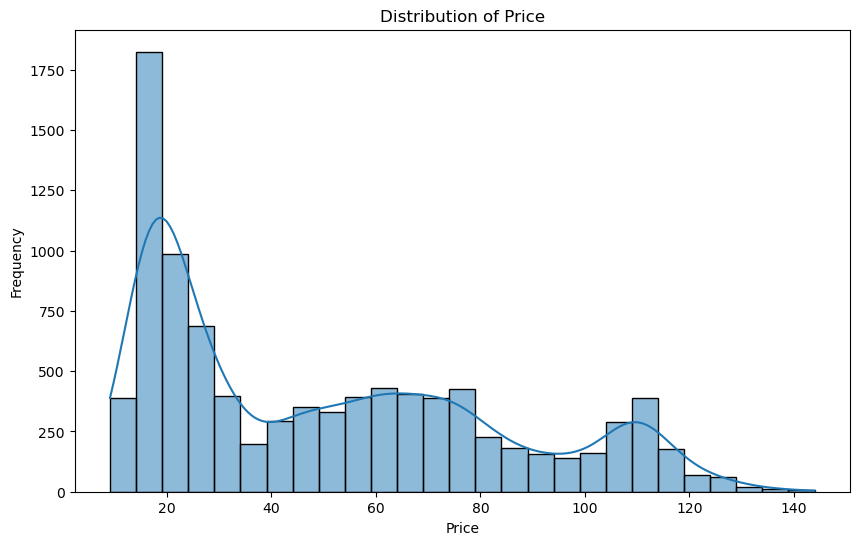

In [41]:
import scipy.stats as stats

plt.figure(figsize = (10, 6))                    # Checking distribution of data
sns.histplot(oil_prices['price'], kde = True)
plt.title('Distribution of Price')
plt.xlabel('Price')                             # Data skewed to the left
plt.ylabel('Frequency')

plt.show()

In [42]:
oil_prices.dtypes

DATE     datetime64[ns]
price           float64
dtype: object

In [43]:
oil_prices.shape

(9391, 2)

In [44]:
duplicate_rows = oil_prices[oil_prices.duplicated()]      # confirm no duplicates

print(duplicate_rows.shape)

(0, 2)


In [45]:
oil_prices.count()

DATE     9391
price    9391
dtype: int64

In [46]:
print(oil_prices.isnull().sum())

DATE     0
price    0
dtype: int64


In [47]:
print(oil_prices.isna().sum())

DATE     0
price    0
dtype: int64


In [48]:
oil_prices.to_csv('oil_prices_sense_check.csv') # sense checking in excel

<AxesSubplot:xlabel='price'>

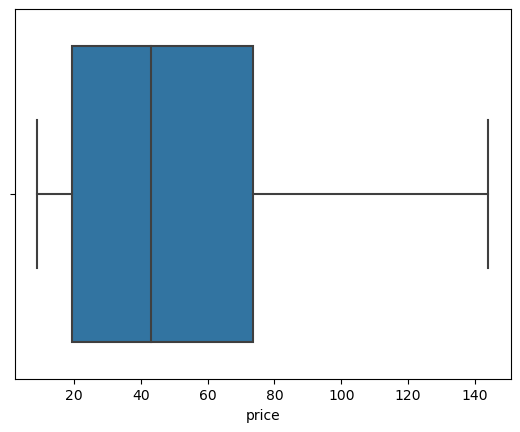

In [49]:
sns.boxplot(x = oil_prices['price'])         # Skewed to the left

In [50]:
Q1 = oil_prices['price'].quantile(0.25)         # Calculating interquartile range
Q3 = oil_prices['price'].quantile(0.75)
price_IQR = Q3 - Q1

print(price_IQR)

54.24500000000001


In [51]:
oil_prices = oil_prices[~((oil_prices['price'] < (Q1 - 1.5 * price_IQR)) | (oil_prices['price'] > (Q3 + 1.5 * price_IQR)))]

oil_prices.shape  # No outliers detected, same shape after outlier removal operation

(9391, 2)

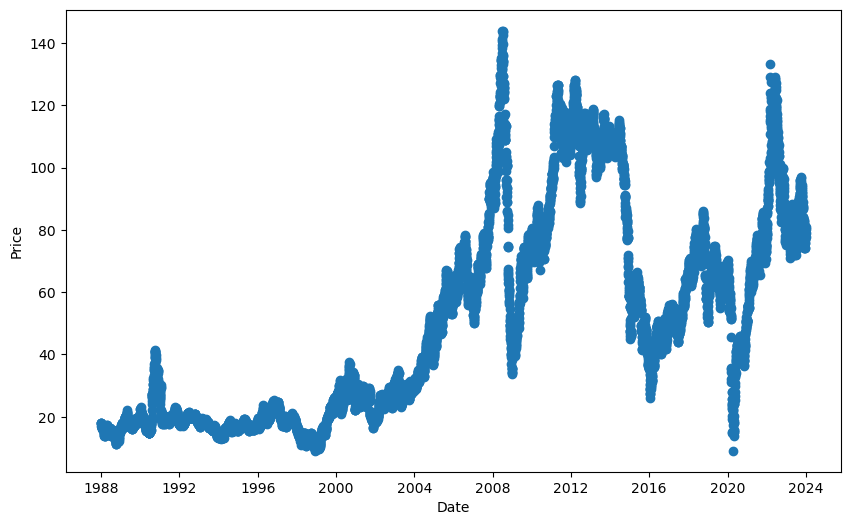

In [52]:
fig, ax = plt.subplots(figsize = (10, 6)) 
ax.scatter(oil_prices['DATE'], oil_prices['price'])
ax.set_xlabel('Date')
ax.set_ylabel('Price')

plt.show()                        # Highly volatile data, particularly around 2008, 2020 and 2023, more steady upto 2000

In [53]:
oil_prices.head(5)

,DATE,price
0,1988-01-01,17.95
1,1988-01-04,17.95
2,1988-01-05,17.08
3,1988-01-06,17.90
4,1988-01-07,17.90


In [54]:
cut_off_date = pd.Timestamp('1998-12-31')

oil_prices = oil_prices[oil_prices['DATE'] <= cut_off_date]

print(oil_prices.shape)
print(oil_prices.head(5))         # Focusing on 1988-1998 only as steadier data to predict

(2870, 2)
        DATE  price
0 1988-01-01  17.95
1 1988-01-04  17.95
2 1988-01-05  17.08
3 1988-01-06  17.90
4 1988-01-07  17.90


In [55]:
Q1 = oil_prices['price'].quantile(0.25)         # Much smaller interquartile range
Q3 = oil_prices['price'].quantile(0.75)
price_IQR = Q3 - Q1

print(price_IQR)

3.4499999999999993


In [56]:
oil_prices = oil_prices[~((oil_prices['price'] < (Q1 - 1.5 * price_IQR)) | (oil_prices['price'] > (Q3 + 1.5 * price_IQR)))]

oil_prices.shape  # Outliers detected and removed

(2711, 2)

<AxesSubplot:xlabel='price'>

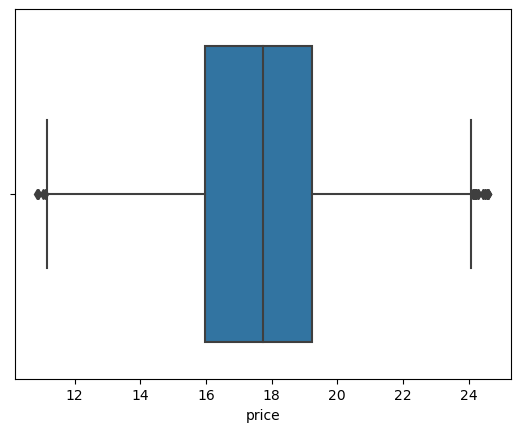

In [57]:
sns.boxplot(x = oil_prices['price'])         # A lot less skewed now after new selection and cleaning

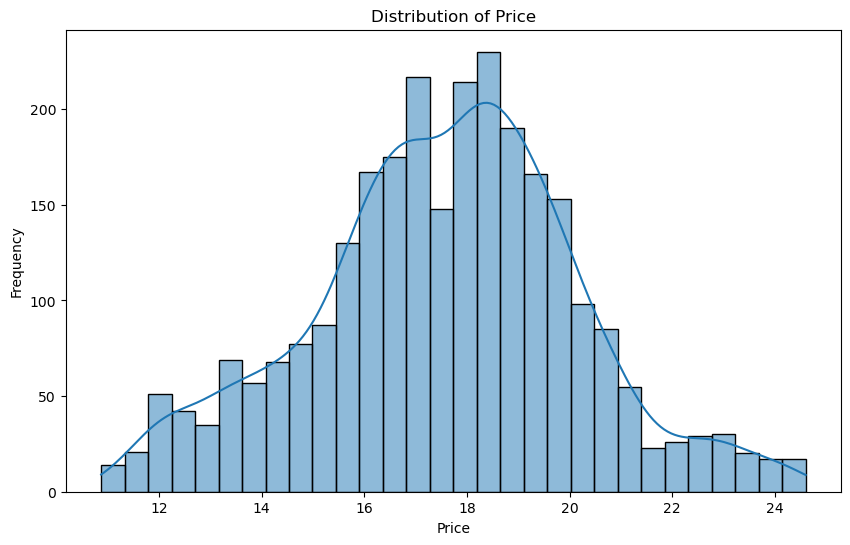

In [58]:
plt.figure(figsize = (10, 6))                    # Checking distribution of data
sns.histplot(oil_prices['price'], kde = True)
plt.title('Distribution of Price')
plt.xlabel('Price')                             # Data significantly more Gaussian now
plt.ylabel('Frequency')

plt.show()

# Train test split

In [59]:
training_array = oil_prices.iloc[:, 1].values      # Extracting price data and converting into an array

print(training_array)

[17.95 17.95 17.08 ... 11.46 11.1  10.87]


In [60]:
training_data = training_array[:-20]   # Creating test data, last 20 values left out as these will become test data

testing_data = training_array[-20:len(training_array)]  # Creating the test data out of last 20 values

In [61]:
training_data.shape         # Checking shape, original size -20 as test data extracted

(2691,)

In [62]:
testing_data.shape         # Checking shape,20 days taken as test data

(20,)

In [63]:
print(testing_data)

[11.94 11.68 12.18 12.74 12.46 12.26 12.31 12.   12.43 11.93 11.88 11.73
 11.51 11.15 11.18 11.45 11.56 11.46 11.1  10.87]


In [ ]:
# Training data and testing data

In [64]:
training_data = training_data.reshape(-1, 1)  # Reshaping the arrays to 2 Dimensions for neural network
testing_data = testing_data.reshape(-1, 1)


In [65]:
print(training_data)

[[17.95]
 [17.95]
 [17.08]
 ...
 [12.11]
 [11.6 ]
 [11.29]]


In [66]:
training_data.shape

(2691, 1)

In [67]:
testing_data.shape

(20, 1)

In [68]:
print(testing_data)

[[11.94]
 [11.68]
 [12.18]
 [12.74]
 [12.46]
 [12.26]
 [12.31]
 [12.  ]
 [12.43]
 [11.93]
 [11.88]
 [11.73]
 [11.51]
 [11.15]
 [11.18]
 [11.45]
 [11.56]
 [11.46]
 [11.1 ]
 [10.87]]


In [69]:
#from sklearn.preprocessing import MinMaxScaler      # Minmax scaling since data is non-Gaussian

#scaler_train = MinMaxScaler()
#scaled_training_data = scaler_train.fit_transform(training_data)

#scaler_test = MinMaxScaler()
#testing_data_reshaped = testing_data.reshape(-1, 1)
#scaled_testing_data = scaler_train.transform(testing_data)




In [70]:
from sklearn.preprocessing import StandardScaler      # Trialling StandardScaler as selected data is now gaussian

scaler = StandardScaler()
training_data = scaler.fit_transform(training_data)

testing_data = scaler.transform(testing_data)

In [71]:
print(training_data)        # checking training_data is normalised

[[ 0.13787032]
 [ 0.13787032]
 [-0.20182434]
 ...
 [-2.14237888]
 [-2.34151023]
 [-2.46255086]]


In [72]:
print(testing_data)        # checking testing_data is normalised

[[-2.208756  ]
 [-2.31027394]
 [-2.11504712]
 [-1.89639309]
 [-2.00572011]
 [-2.08381083]
 [-2.06428815]
 [-2.18532878]
 [-2.01743372]
 [-2.21266053]
 [-2.23218321]
 [-2.29075126]
 [-2.37665106]
 [-2.51721436]
 [-2.50550076]
 [-2.40007828]
 [-2.35712838]
 [-2.39617374]
 [-2.53673705]
 [-2.62654138]]


In [73]:
#log_training_data = np.log1p(training_data)

#log_testing_data = np.log1p(testing_data)

In [74]:
#boxcox_training_data, lambda_ = stats.boxcox(training_data)

#boxcox_testing_data = stats.boxcox(testing_data, lmbda = lambda_)

In [75]:
x_training_data = []          # Creating python lists to populate the timesteps
y_training_data = []


In [76]:
for i in range(20, len(training_data)):
    x_training_data.append(training_data[i-20:i, 0])
    y_training_data.append(training_data[i, 0])
    
# Populating 20 timesteps in x_training data and the next respective value in y_training_data 

In [77]:
x_training_data = np.array(x_training_data)           # Converting to numpy arrays for tensorflow
y_training_data = np.array(y_training_data)


In [78]:
print(x_training_data.shape) # Validated as correct shape as 2D, 20 timesteps, 2671 = len(training_data) - 20
print(y_training_data.shape) # Validated as 1D with 2671 = len(training_data) - 20, 

(2671, 20)
(2671,)


In [79]:
x_training_data = np.reshape(x_training_data, (x_training_data.shape[0],
                                              x_training_data.shape[1],
                                              1))

# Reshaping x_training_data to 3D for RNN layer in Tensorflow

In [80]:
print(x_training_data.shape) # Checking new shape

(2671, 20, 1)


In [81]:
y_training_data.shape

(2671,)

In [82]:
#rnn = Sequential()                     # Initialise instance of Sequential class

In [83]:
#rnn.add(LSTM(units = 5, return_sequences = True, input_shape = (20, 1)))         # Architecting the Vanilla LSTM
#rnn.add(Dropout(0.2))

#rnn.add(LSTM(units = 5))
#rnn.add(Dropout(0.2))

#rnn.add(Dense(units = 1))

In [84]:
#rnn.compile(optimizer = 'adam', loss = 'mean_squared_error')         # Compiling with standard optimizer and loss function

In [85]:
#rnn.fit(x_training_data, y_training_data, epochs = 10, batch_size = 1)  # Training the Vanilla LSTM model

In [86]:
testing_data.shape

(20, 1)

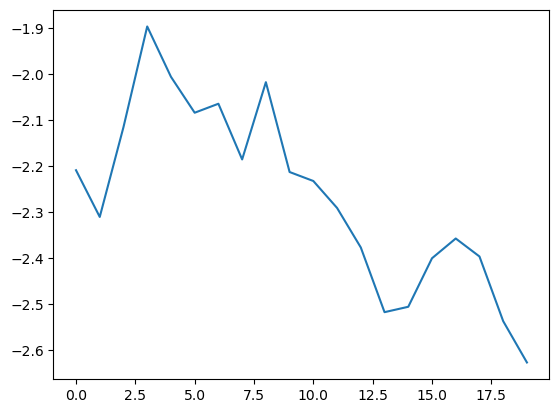

In [87]:
plt.plot(testing_data)

In [88]:
print(training_data)     

[[ 0.13787032]
 [ 0.13787032]
 [-0.20182434]
 ...
 [-2.14237888]
 [-2.34151023]
 [-2.46255086]]


In [89]:
print(testing_data)

[[-2.208756  ]
 [-2.31027394]
 [-2.11504712]
 [-1.89639309]
 [-2.00572011]
 [-2.08381083]
 [-2.06428815]
 [-2.18532878]
 [-2.01743372]
 [-2.21266053]
 [-2.23218321]
 [-2.29075126]
 [-2.37665106]
 [-2.51721436]
 [-2.50550076]
 [-2.40007828]
 [-2.35712838]
 [-2.39617374]
 [-2.53673705]
 [-2.62654138]]


In [90]:
print(y_training_data)

[-0.51418724 -0.58446889 -0.5532326  ... -2.14237888 -2.34151023
 -2.46255086]


In [91]:
oil_prices.shape

(2711, 2)

In [92]:
training_data.shape

(2691, 1)

In [93]:
testing_data.shape

(20, 1)

In [94]:
last_20_training = training_data[-20:]         # preparing data for x_testing data, timesteps leading up to predicted value
first_20_testing = testing_data[:20]           # Will concatenate these two variables to form x_testing_data

print(last_20_training)
print(first_20_testing)

[[-1.14281758]
 [-1.07644047]
 [-1.18967202]
 [-1.24433553]
 [-1.25604914]
 [-1.12719944]
 [-1.22481285]
 [-1.32242625]
 [-1.36537615]
 [-1.41223059]
 [-1.45127595]
 [-1.70507081]
 [-1.84563412]
 [-1.72459349]
 [-1.90029763]
 [-2.08381083]
 [-2.19313785]
 [-2.14237888]
 [-2.34151023]
 [-2.46255086]]
[[-2.208756  ]
 [-2.31027394]
 [-2.11504712]
 [-1.89639309]
 [-2.00572011]
 [-2.08381083]
 [-2.06428815]
 [-2.18532878]
 [-2.01743372]
 [-2.21266053]
 [-2.23218321]
 [-2.29075126]
 [-2.37665106]
 [-2.51721436]
 [-2.50550076]
 [-2.40007828]
 [-2.35712838]
 [-2.39617374]
 [-2.53673705]
 [-2.62654138]]


In [95]:
x_test_data = np.concatenate([last_20_training, first_20_testing]) # Taking last 20 test values and 20 preceding values

In [96]:
#x_test_data = oil_prices[len(oil_prices) - 40:] 
#x_test_data = x_test_data.iloc[:, 1].values
x_test_data.shape


(40, 1)

In [97]:
len(x_test_data)        # Contains 20 test values and 20 preceding values = 40

40

In [98]:
print(x_test_data)

[[-1.14281758]
 [-1.07644047]
 [-1.18967202]
 [-1.24433553]
 [-1.25604914]
 [-1.12719944]
 [-1.22481285]
 [-1.32242625]
 [-1.36537615]
 [-1.41223059]
 [-1.45127595]
 [-1.70507081]
 [-1.84563412]
 [-1.72459349]
 [-1.90029763]
 [-2.08381083]
 [-2.19313785]
 [-2.14237888]
 [-2.34151023]
 [-2.46255086]
 [-2.208756  ]
 [-2.31027394]
 [-2.11504712]
 [-1.89639309]
 [-2.00572011]
 [-2.08381083]
 [-2.06428815]
 [-2.18532878]
 [-2.01743372]
 [-2.21266053]
 [-2.23218321]
 [-2.29075126]
 [-2.37665106]
 [-2.51721436]
 [-2.50550076]
 [-2.40007828]
 [-2.35712838]
 [-2.39617374]
 [-2.53673705]
 [-2.62654138]]


In [99]:
x_test_data = np.reshape(x_test_data, (-1, 1))  # Reshaping array for predictions to 2D

In [100]:
print(x_test_data)

[[-1.14281758]
 [-1.07644047]
 [-1.18967202]
 [-1.24433553]
 [-1.25604914]
 [-1.12719944]
 [-1.22481285]
 [-1.32242625]
 [-1.36537615]
 [-1.41223059]
 [-1.45127595]
 [-1.70507081]
 [-1.84563412]
 [-1.72459349]
 [-1.90029763]
 [-2.08381083]
 [-2.19313785]
 [-2.14237888]
 [-2.34151023]
 [-2.46255086]
 [-2.208756  ]
 [-2.31027394]
 [-2.11504712]
 [-1.89639309]
 [-2.00572011]
 [-2.08381083]
 [-2.06428815]
 [-2.18532878]
 [-2.01743372]
 [-2.21266053]
 [-2.23218321]
 [-2.29075126]
 [-2.37665106]
 [-2.51721436]
 [-2.50550076]
 [-2.40007828]
 [-2.35712838]
 [-2.39617374]
 [-2.53673705]
 [-2.62654138]]


In [101]:
final_x_test_data = []                               # Grouping test data into 20 arrays of size 20 as timesteps for test

for i in range(20, len(x_test_data)):
    final_x_test_data.append(x_test_data[i-20:i, 0]) 
    
                                     
final_x_test_data = np.array(final_x_test_data)         # Turning into array for neural network

In [102]:
print(final_x_test_data)

[[-1.14281758 -1.07644047 -1.18967202 -1.24433553 -1.25604914 -1.12719944
  -1.22481285 -1.32242625 -1.36537615 -1.41223059 -1.45127595 -1.70507081
  -1.84563412 -1.72459349 -1.90029763 -2.08381083 -2.19313785 -2.14237888
  -2.34151023 -2.46255086]
 [-1.07644047 -1.18967202 -1.24433553 -1.25604914 -1.12719944 -1.22481285
  -1.32242625 -1.36537615 -1.41223059 -1.45127595 -1.70507081 -1.84563412
  -1.72459349 -1.90029763 -2.08381083 -2.19313785 -2.14237888 -2.34151023
  -2.46255086 -2.208756  ]
 [-1.18967202 -1.24433553 -1.25604914 -1.12719944 -1.22481285 -1.32242625
  -1.36537615 -1.41223059 -1.45127595 -1.70507081 -1.84563412 -1.72459349
  -1.90029763 -2.08381083 -2.19313785 -2.14237888 -2.34151023 -2.46255086
  -2.208756   -2.31027394]
 [-1.24433553 -1.25604914 -1.12719944 -1.22481285 -1.32242625 -1.36537615
  -1.41223059 -1.45127595 -1.70507081 -1.84563412 -1.72459349 -1.90029763
  -2.08381083 -2.19313785 -2.14237888 -2.34151023 -2.46255086 -2.208756
  -2.31027394 -2.11504712]
 [-1.2

In [103]:
final_x_test_data = np.reshape(final_x_test_data, (final_x_test_data.shape[0], final_x_test_data.shape[1], 1))

# Reshaping to be compatible with tensorflow

In [104]:
print(final_x_test_data)

[[[-1.14281758]
  [-1.07644047]
  [-1.18967202]
  [-1.24433553]
  [-1.25604914]
  [-1.12719944]
  [-1.22481285]
  [-1.32242625]
  [-1.36537615]
  [-1.41223059]
  [-1.45127595]
  [-1.70507081]
  [-1.84563412]
  [-1.72459349]
  [-1.90029763]
  [-2.08381083]
  [-2.19313785]
  [-2.14237888]
  [-2.34151023]
  [-2.46255086]]

 [[-1.07644047]
  [-1.18967202]
  [-1.24433553]
  [-1.25604914]
  [-1.12719944]
  [-1.22481285]
  [-1.32242625]
  [-1.36537615]
  [-1.41223059]
  [-1.45127595]
  [-1.70507081]
  [-1.84563412]
  [-1.72459349]
  [-1.90029763]
  [-2.08381083]
  [-2.19313785]
  [-2.14237888]
  [-2.34151023]
  [-2.46255086]
  [-2.208756  ]]

 [[-1.18967202]
  [-1.24433553]
  [-1.25604914]
  [-1.12719944]
  [-1.22481285]
  [-1.32242625]
  [-1.36537615]
  [-1.41223059]
  [-1.45127595]
  [-1.70507081]
  [-1.84563412]
  [-1.72459349]
  [-1.90029763]
  [-2.08381083]
  [-2.19313785]
  [-2.14237888]
  [-2.34151023]
  [-2.46255086]
  [-2.208756  ]
  [-2.31027394]]

 [[-1.24433553]
  [-1.25604914]
  

# Vanilla LSTM

In [105]:
# pip install --upgrade pip

In [106]:
#!pip install --upgrade tensorflow          

In [107]:
#!pip install --upgrade scikit-learn

In [108]:
#!pip install --upgrade keras

In [109]:
#!pip install scikeras  

# Newer version for KerasRegressor

In [110]:
import tensorflow as tf
import sklearn
import keras

In [111]:
pip --version                    # checking versions of important libraries to ensure compatibility

pip 24.2 from C:\Users\paddy\anaconda3\lib\site-packages\pip (python 3.9)Note: you may need to restart the kernel to use updated packages.




In [112]:
print(tf.__version__)

2.17.0


In [113]:
print(sklearn.__version__)
print(keras.__version__)

1.5.1
3.5.0


In [114]:
from tensorflow.keras.models import Sequential        # Importing classes from tensorflow for RNN
from tensorflow.keras.layers import Dense, LSTM, Dropout, RNN, Input
#from tensorflow.keras.wrappers.scikit_learn import KerasRegressor        # No longer compatible
from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit
from scipy.stats import randint, uniform
from sklearn.metrics import mean_squared_error
from scikeras.wrappers import KerasRegressor

def build_rnn(units = 5, dropout_rate = 0.2, optimizer = 'adam', num_layers = 2):     # function for RNN build
    rnn = Sequential()
    

    
    rnn.add(LSTM(units = units, return_sequences = True, input_shape = (20, 1)))
    rnn.add(Dropout(dropout_rate))
    
    for _ in range(num_layers -1):                                                    # Loop for adding layers
        rnn.add(LSTM(units = units, return_sequences = True))
        rnn.add(Dropout(dropout_rate))
    

    rnn.add(LSTM(units = units))
    rnn.add(Dropout(dropout_rate))
    
    rnn.add(Dense(units = 1))
    
    rnn.compile(optimizer = optimizer, loss = 'mean_squared_error')                  # Hardcoding mean squared error
    return rnn



In [115]:
model = KerasRegressor(model = build_rnn, verbose = 1)      # To use keras model as scikit-learn model for cross validation

In [116]:
param_distributions = {                                           # Defining the hyperparameter space for a randomized search
    'model__units': randint(5, 50),
    'model__dropout_rate': uniform(0.1, 0.5),
    'batch_size': [16, 32, 64],
    'epochs': [10, 20, 30],
    'model__optimizer': ['adam', 'rmsprop'],
    'model__num_layers': [1, 2, 3, 4]
}

In [117]:
tscv = TimeSeriesSplit(n_splits = 5)           # Timeseries split to maintain temporal nature of data for validation    

In [118]:
random_search = RandomizedSearchCV(estimator = model,                  # Using RandomizedSearchCV for cross validation
                                  param_distributions = param_distributions,
                                  n_iter = 10,
                                  cv = tscv,
                                  verbose = 2,
                                  n_jobs = -1)


In [119]:
testing_data.shape

(20, 1)

In [120]:
testing_data = np.array(testing_data).reshape(-1)           # Change to 1D for regressor

testing_data.shape

(20,)

In [121]:
final_x_test_data.shape

(20, 20, 1)

In [122]:
random_search.fit(x_training_data, y_training_data)              # Fitting the RandomizedSearchCV

best_model = random_search.best_estimator_                      # Finding best model 
best_params = random_search.best_params_                        # Finding best params 

print('Best parameters:', best_params)

test_loss = best_model.score(final_x_test_data, testing_data)      # Calculating the test loss

print(f"Test Loss: {test_loss}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\paddy\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
167/167 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - loss: 0.2106
Epoch 2/30
167/167 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0731
Epoch 3/30
167/167 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0617
Epoch 4/30
167/167 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0548
Epoch 5/30
167/167 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0522
Epoch 6/30
167/167 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0491
Epoch 7/30
167/167 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0490
Epoch 8/30
167/167 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0448
Epoch 9/30
167/167 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0466
Epoch 10/30
167/167 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0503
Epoch 11/30
167/167 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0404
Epoch 12/30
167/167 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0368
Epoch 13/30
167/167 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0359
Epoch 14/30
167/167 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0394
Epoch 15/30
167/167 ━━━━━━━━━━━━━━━━━━━━ 5

In [123]:
print(test_loss)

0.5956487696749937


In [124]:
predictions = best_model.predict(final_x_test_data)     # making the predictions

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [125]:
# stop

In [126]:
print(testing_data)     # ensuring still normalised

[-2.208756   -2.31027394 -2.11504712 -1.89639309 -2.00572011 -2.08381083
 -2.06428815 -2.18532878 -2.01743372 -2.21266053 -2.23218321 -2.29075126
 -2.37665106 -2.51721436 -2.50550076 -2.40007828 -2.35712838 -2.39617374
 -2.53673705 -2.62654138]


In [127]:
print(predictions)     # ensuring still normalised

[-2.3816104 -2.2220192 -2.2995095 -2.15136   -1.9896984 -2.0594738
 -2.107378  -2.0971105 -2.1875186 -2.062001  -2.2094262 -2.2196996
 -2.2736485 -2.336975  -2.4399245 -2.44433   -2.3835833 -2.3536546
 -2.3761191 -2.4696915]


In [128]:
predictions = predictions.reshape(-1, 1)   # Reshaping predictions array for inverse transformation

In [129]:
predictions = scaler.inverse_transform(predictions)         # De-normalising the predictions

#predictions = np.expm1(predictions)

#predictions = stats.inv_boxcox(predictions, lambda_)


In [130]:
testing_data = testing_data.reshape(-1, 1)                 # Reshaping testing_data for inverse transformation
testing_data = scaler.inverse_transform(testing_data)      # De-normalising the testing data

In [131]:
print(testing_data)        # checking testing_data is de-normalised

[[11.94]
 [11.68]
 [12.18]
 [12.74]
 [12.46]
 [12.26]
 [12.31]
 [12.  ]
 [12.43]
 [11.93]
 [11.88]
 [11.73]
 [11.51]
 [11.15]
 [11.18]
 [11.45]
 [11.56]
 [11.46]
 [11.1 ]
 [10.87]]


In [132]:
predictions = predictions.flatten()       # turning one dimensional

In [133]:
testing_data = testing_data.flatten()     # turning one dimensional

In [134]:
print(predictions)       # Checking predictions are de-normalised

[11.497298 11.906031 11.707569 12.086998 12.501034 12.32233  12.199641
 12.225938 11.994391 12.315858 11.938283 11.911972 11.773802 11.611615
 11.347949 11.336666 11.492246 11.568896 11.511362 11.271711]


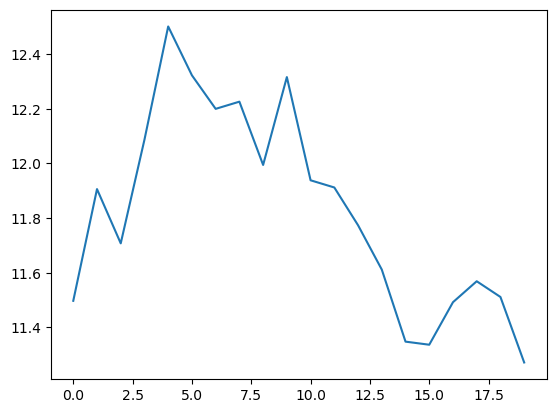

In [135]:
plt.plot(predictions)     # plotting the predictions visually

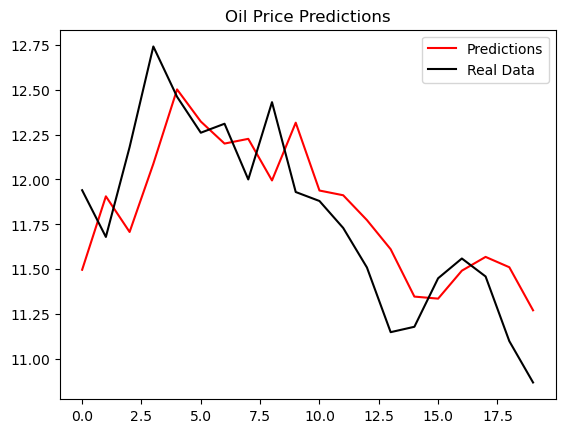

In [136]:
plt.plot(predictions, color = 'red', label = 'Predictions')        
plt.plot(testing_data, color = 'black', label = 'Real Data')

plt.title('Oil Price Predictions')

plt.legend()                                  # Plotting predictions vs real data

In [138]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

mse = mean_squared_error(testing_data, predictions)               # Calculcating mean squared error from test
rmse = np.sqrt(mse)
r2 = r2_score(testing_data, predictions)
mape = mean_absolute_percentage_error(testing_data, predictions)


print('Mean Squared Error:', mse) 
print('Root Mean Squared Error:', rmse)
print('R Squared:', r2)
print('Mean Absolute Percentage Error:', mape)                     

Mean Squared Error: 0.10056980915041121
Root Mean Squared Error: 0.3171274336136992
R Squared: 0.5956488681990072
Mean Absolute Percentage Error: 0.02245350407106039


# GRU

In [139]:
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Layer


In [140]:
#!pip install tensorflow_addons

In [141]:
testing_data.shape  # checking shape, will re-normalise for new model

(20,)

In [142]:
predictions.shape    # checking shape for new model

(20,)

In [143]:
#predictions = predictions.reshape(-1, 1)

In [144]:
testing_data = testing_data.reshape(-1, 1)     # Converting to 2D for normalisation

In [145]:
predictions    # checking if normalised

array([11.497298, 11.906031, 11.707569, 12.086998, 12.501034, 12.32233 ,
       12.199641, 12.225938, 11.994391, 12.315858, 11.938283, 11.911972,
       11.773802, 11.611615, 11.347949, 11.336666, 11.492246, 11.568896,
       11.511362, 11.271711], dtype=float32)

In [146]:
testing_data    # checking if normalised

array([[11.94],
       [11.68],
       [12.18],
       [12.74],
       [12.46],
       [12.26],
       [12.31],
       [12.  ],
       [12.43],
       [11.93],
       [11.88],
       [11.73],
       [11.51],
       [11.15],
       [11.18],
       [11.45],
       [11.56],
       [11.46],
       [11.1 ],
       [10.87]])

In [147]:
testing_data = scaler.transform(testing_data)         # re-normalising testing_data for new variant

In [148]:
testing_data    # Checked and renormalised

array([[-2.208756  ],
       [-2.31027394],
       [-2.11504712],
       [-1.89639309],
       [-2.00572011],
       [-2.08381083],
       [-2.06428815],
       [-2.18532878],
       [-2.01743372],
       [-2.21266053],
       [-2.23218321],
       [-2.29075126],
       [-2.37665106],
       [-2.51721436],
       [-2.50550076],
       [-2.40007828],
       [-2.35712838],
       [-2.39617374],
       [-2.53673705],
       [-2.62654138]])

In [149]:
testing_data = testing_data.flatten()    # turning to one dimensional

In [150]:
testing_data.shape       # checking new dimension shape

(20,)

In [151]:
final_x_test_data    # checking final_x_test_data whether normalised from previous model

array([[[-1.14281758],
        [-1.07644047],
        [-1.18967202],
        [-1.24433553],
        [-1.25604914],
        [-1.12719944],
        [-1.22481285],
        [-1.32242625],
        [-1.36537615],
        [-1.41223059],
        [-1.45127595],
        [-1.70507081],
        [-1.84563412],
        [-1.72459349],
        [-1.90029763],
        [-2.08381083],
        [-2.19313785],
        [-2.14237888],
        [-2.34151023],
        [-2.46255086]],

       [[-1.07644047],
        [-1.18967202],
        [-1.24433553],
        [-1.25604914],
        [-1.12719944],
        [-1.22481285],
        [-1.32242625],
        [-1.36537615],
        [-1.41223059],
        [-1.45127595],
        [-1.70507081],
        [-1.84563412],
        [-1.72459349],
        [-1.90029763],
        [-2.08381083],
        [-2.19313785],
        [-2.14237888],
        [-2.34151023],
        [-2.46255086],
        [-2.208756  ]],

       [[-1.18967202],
        [-1.24433553],
        [-1.25604914],
       

In [152]:
import tensorflow as tf
import sys
import sklearn

print(sys.version)

print(tf.__version__)
print(sklearn.__version__)    # checking versions of important libraries

3.9.13 (main, Aug 25 2022, 23:51:50) [MSC v.1916 64 bit (AMD64)]
2.17.0
1.5.1


In [153]:
from tensorflow import keras

print(keras.__version__)

3.5.0


In [154]:
#from tensorflow_addons.rnn import PeepholeLSTMCell
from tensorflow.keras.layers import GRU          # Importing for GRU variant

def build_rnn(units = 5, dropout_rate = 0.2, optimizer = 'adam', num_layers = 2):     # function with default parameters
    rnn = Sequential()
    
    rnn.add(Input(shape = (20, 1)))                                                   # Input layer
    
    rnn.add(GRU(units = units, return_sequences = True))                              # First GRU layer
    rnn.add(Dropout(dropout_rate))
    
    for _ in range(num_layers -1):                                                    # Loop for adding layers
        rnn.add(GRU(units = units, return_sequences = True))
        rnn.add(Dropout(dropout_rate))
    
    rnn.add(GRU(units = units))
    rnn.add(Dropout(dropout_rate))
    
    rnn.add(Dense(units = 1))                                                         # Output layer
    
    rnn.compile(optimizer = optimizer, loss = 'mean_squared_error')                   # Hardcoding mean squared error
    return rnn



In [155]:
model = KerasRegressor(model = build_rnn, verbose = 1)      # To use keras model as scikit-learn model for cross validation

In [156]:
param_distributions = {                                           # Defining the hyperparameter space for a randomized search
    'model__units': randint(5, 50),
    'model__dropout_rate': uniform(0.1, 0.5),
    'batch_size': [16, 32, 64],
    'epochs': [10, 20, 30],
    'model__optimizer': ['adam', 'rmsprop'],
    'model__num_layers': [1, 2, 3, 4]
}

In [157]:
tscv = TimeSeriesSplit(n_splits = 5)           # Timeseries split to maintain temporal nature of data for validation    

In [158]:
random_search = RandomizedSearchCV(estimator = model,                  # Using RandomizedSearchCV for cross validation
                                  param_distributions = param_distributions,
                                  n_iter = 10,
                                  cv = tscv,
                                  verbose = 2,
                                  n_jobs = -1)                         # To use all available cores for processing


In [159]:
y_training_data                      # Checking data is normalised before randomizedSearchCV is fit

array([-0.51418724, -0.58446889, -0.5532326 , ..., -2.14237888,
       -2.34151023, -2.46255086])

In [160]:
x_training_data.shape               # Checking the shape before randomizedSearchCV is fit

(2671, 20, 1)

In [161]:
y_training_data.shape              # Checking the shape before randomizedSearchCV is fit

(2671,)

In [162]:
final_x_test_data.shape       # Checking the shape calculating test loss

(20, 20, 1)

In [163]:
testing_data.shape            # Checking testing_data shape before loss calculation

(20,)

In [164]:
random_search.fit(x_training_data, y_training_data)              # Fitting the RandomizedSearch

best_model = random_search.best_estimator_                      # Finding best model 
best_params = random_search.best_params_                        # Finding best params 

print('Best parameters:', best_params)           

test_loss = best_model.score(final_x_test_data, testing_data)   # Calculating the test loss

print(f"Test Loss: {test_loss}") 

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Epoch 1/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.2744
Epoch 2/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0582
Epoch 3/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0526
Epoch 4/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0480
Epoch 5/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0434
Epoch 6/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0449
Epoch 7/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0437
Epoch 8/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0386
Epoch 9/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0385
Epoch 10/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0401
Best parameters: {'batch_size': 16, 'epochs': 10, 'model__dropout_rate': 0.25506904563269317, 'model__num_layers': 1, 'model__optimizer': 'rmsprop', 'model__units': 25}
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 249ms/step
Test Loss: -0.22452745668202256


In [165]:
print(test_loss)     # Printing the test loss

-0.22452745668202256


In [166]:
final_x_test_data    # checking final_x_test_data is normalised

array([[[-1.14281758],
        [-1.07644047],
        [-1.18967202],
        [-1.24433553],
        [-1.25604914],
        [-1.12719944],
        [-1.22481285],
        [-1.32242625],
        [-1.36537615],
        [-1.41223059],
        [-1.45127595],
        [-1.70507081],
        [-1.84563412],
        [-1.72459349],
        [-1.90029763],
        [-2.08381083],
        [-2.19313785],
        [-2.14237888],
        [-2.34151023],
        [-2.46255086]],

       [[-1.07644047],
        [-1.18967202],
        [-1.24433553],
        [-1.25604914],
        [-1.12719944],
        [-1.22481285],
        [-1.32242625],
        [-1.36537615],
        [-1.41223059],
        [-1.45127595],
        [-1.70507081],
        [-1.84563412],
        [-1.72459349],
        [-1.90029763],
        [-2.08381083],
        [-2.19313785],
        [-2.14237888],
        [-2.34151023],
        [-2.46255086],
        [-2.208756  ]],

       [[-1.18967202],
        [-1.24433553],
        [-1.25604914],
       

In [167]:
predictions = best_model.predict(final_x_test_data)       # making predictions on final_x_test_data

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [168]:
print(predictions)                   # printing predictions and checking is normalised

[-2.233338  -2.095913  -2.131999  -2.0089893 -1.8294333 -1.8646379
 -1.9225923 -1.9226142 -2.0053163 -1.9107112 -2.0218346 -2.0594954
 -2.1077147 -2.1754367 -2.2807581 -2.3008666 -2.2407424 -2.1988785
 -2.2125413 -2.3028188]


In [169]:
predictions = predictions.reshape(-1, 1)          # Reshaping predictions for inverse_transform

In [170]:
predictions = scaler.inverse_transform(predictions)     # De-normalising predictions for readability

In [171]:
print(predictions)          # checking predictions have been de-normalised

[[11.877042 ]
 [12.229005 ]
 [12.136584 ]
 [12.451627 ]
 [12.911492 ]
 [12.821329 ]
 [12.6729   ]
 [12.672844 ]
 [12.461034 ]
 [12.703329 ]
 [12.418729 ]
 [12.322274 ]
 [12.198779 ]
 [12.025334 ]
 [11.755593 ]
 [11.704093 ]
 [11.858079 ]
 [11.965298 ]
 [11.9303055]
 [11.699094 ]]


In [172]:
testing_data = testing_data.reshape(-1, 1)                 # Reshaping testing_data for inverse_transform
testing_data = scaler.inverse_transform(testing_data)      # De-normalising the testing data

In [173]:
print(testing_data)       # Printing testing_data to ensure is de-normalised

[[11.94]
 [11.68]
 [12.18]
 [12.74]
 [12.46]
 [12.26]
 [12.31]
 [12.  ]
 [12.43]
 [11.93]
 [11.88]
 [11.73]
 [11.51]
 [11.15]
 [11.18]
 [11.45]
 [11.56]
 [11.46]
 [11.1 ]
 [10.87]]


In [174]:
predictions = predictions.flatten()         # Converting predictions to one dimension

In [175]:
testing_data = testing_data.flatten()       # Converting testing_data to one dimension

In [176]:
print(predictions)        # Ensuring predictions are de-normalised and flattened

[11.877042  12.229005  12.136584  12.451627  12.911492  12.821329
 12.6729    12.672844  12.461034  12.703329  12.418729  12.322274
 12.198779  12.025334  11.755593  11.704093  11.858079  11.965298
 11.9303055 11.699094 ]


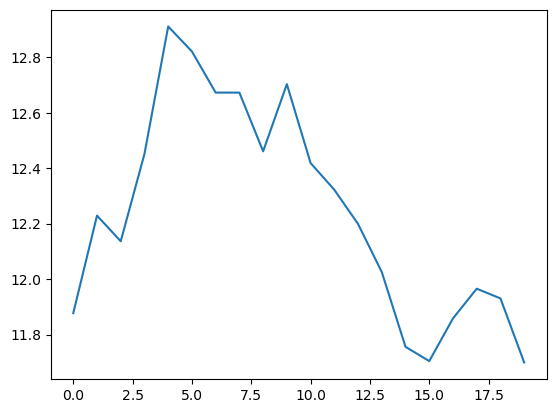

In [177]:
plt.plot(predictions)    # Plotting predictions

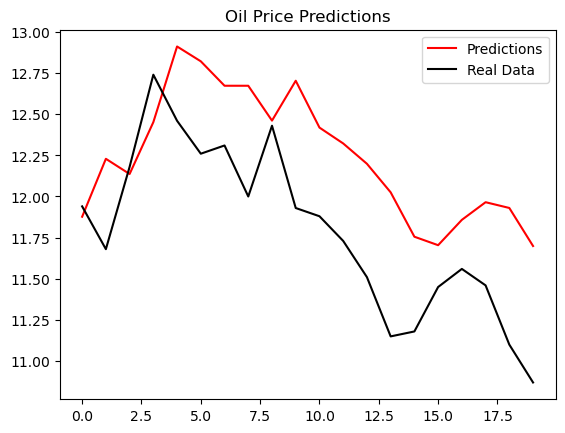

In [178]:
plt.plot(predictions, color = 'red', label = 'Predictions')        
plt.plot(testing_data, color = 'black', label = 'Real Data')

plt.title('Oil Price Predictions')

plt.legend()           # Plotting predictions vs real data to assess performance 

In [179]:
mse = mean_squared_error(testing_data, predictions)               # Calculcating mean squared error from test
rmse = np.sqrt(mse)
r2 = r2_score(testing_data, predictions)
mape = mean_absolute_percentage_error(testing_data, predictions)


print('Mean Squared Error:', mse) 
print('Root Mean Squared Error:', rmse)
print('R Squared:', r2)
print('Mean Absolute Percentage Error:', mape)                             

Mean Squared Error: 0.3045631083666998
Root Mean Squared Error: 0.5518723660111093
R Squared: -0.22452690935030928
Mean Absolute Percentage Error: 0.0421091392546325


# LSTM with Attention Mechanism

In [180]:
testing_data.shape     # checking testing_data shape for normalisation for new model

(20,)

In [181]:
predictions.shape     # checking predictions shape for normalisation for new model

(20,)

In [182]:
testing_data = testing_data.reshape(-1, 1)     # Converting to 2D for normalisation

In [183]:
predictions          # Checking whether predictions is normalised or not

array([11.877042 , 12.229005 , 12.136584 , 12.451627 , 12.911492 ,
       12.821329 , 12.6729   , 12.672844 , 12.461034 , 12.703329 ,
       12.418729 , 12.322274 , 12.198779 , 12.025334 , 11.755593 ,
       11.704093 , 11.858079 , 11.965298 , 11.9303055, 11.699094 ],
      dtype=float32)

In [184]:
testing_data        # Checking testing_data whether normalised or not

array([[11.94],
       [11.68],
       [12.18],
       [12.74],
       [12.46],
       [12.26],
       [12.31],
       [12.  ],
       [12.43],
       [11.93],
       [11.88],
       [11.73],
       [11.51],
       [11.15],
       [11.18],
       [11.45],
       [11.56],
       [11.46],
       [11.1 ],
       [10.87]])

In [185]:
testing_data = scaler.transform(testing_data)         # renormalising testing_data for new variant

In [186]:
testing_data    # Checked and renormalised

array([[-2.208756  ],
       [-2.31027394],
       [-2.11504712],
       [-1.89639309],
       [-2.00572011],
       [-2.08381083],
       [-2.06428815],
       [-2.18532878],
       [-2.01743372],
       [-2.21266053],
       [-2.23218321],
       [-2.29075126],
       [-2.37665106],
       [-2.51721436],
       [-2.50550076],
       [-2.40007828],
       [-2.35712838],
       [-2.39617374],
       [-2.53673705],
       [-2.62654138]])

In [187]:
testing_data = testing_data.flatten()         # Converting to one-dimension

In [188]:
testing_data.shape          # Checking shape converted correctly

(20,)

In [189]:
final_x_test_data          # Checking final_x_test_data, is still normalised

array([[[-1.14281758],
        [-1.07644047],
        [-1.18967202],
        [-1.24433553],
        [-1.25604914],
        [-1.12719944],
        [-1.22481285],
        [-1.32242625],
        [-1.36537615],
        [-1.41223059],
        [-1.45127595],
        [-1.70507081],
        [-1.84563412],
        [-1.72459349],
        [-1.90029763],
        [-2.08381083],
        [-2.19313785],
        [-2.14237888],
        [-2.34151023],
        [-2.46255086]],

       [[-1.07644047],
        [-1.18967202],
        [-1.24433553],
        [-1.25604914],
        [-1.12719944],
        [-1.22481285],
        [-1.32242625],
        [-1.36537615],
        [-1.41223059],
        [-1.45127595],
        [-1.70507081],
        [-1.84563412],
        [-1.72459349],
        [-1.90029763],
        [-2.08381083],
        [-2.19313785],
        [-2.14237888],
        [-2.34151023],
        [-2.46255086],
        [-2.208756  ]],

       [[-1.18967202],
        [-1.24433553],
        [-1.25604914],
       

In [190]:
y_training_data         # Checking y_training_data, is still normalised

array([-0.51418724, -0.58446889, -0.5532326 , ..., -2.14237888,
       -2.34151023, -2.46255086])

In [191]:
x_training_data         # Checking x_training_data, is still normalised

array([[[ 0.13787032],
        [ 0.13787032],
        [-0.20182434],
        ...,
        [-0.44781012],
        [-0.57275528],
        [-0.58446889]],

       [[ 0.13787032],
        [-0.20182434],
        [ 0.11834764],
        ...,
        [-0.57275528],
        [-0.58446889],
        [-0.51418724]],

       [[-0.20182434],
        [ 0.11834764],
        [ 0.11834764],
        ...,
        [-0.58446889],
        [-0.51418724],
        [-0.58446889]],

       ...,

       [[-1.43565781],
        [-1.28338089],
        [-1.26385821],
        ...,
        [-1.90029763],
        [-2.08381083],
        [-2.19313785]],

       [[-1.28338089],
        [-1.26385821],
        [-1.14281758],
        ...,
        [-2.08381083],
        [-2.19313785],
        [-2.14237888]],

       [[-1.26385821],
        [-1.14281758],
        [-1.07644047],
        ...,
        [-2.19313785],
        [-2.14237888],
        [-2.34151023]]])

In [192]:
x_training_data.shape           # Checking shape of x_training_data

(2671, 20, 1)

In [193]:
y_training_data.shape          # Checking shape of y_training_data

(2671,)

In [194]:
final_x_test_data.shape        # Checking shape of final_x_test_data

(20, 20, 1)

In [195]:
testing_data.shape             # Checking shape of testing_data

(20,)

In [196]:
from tensorflow.keras.layers import Attention, Input                                  # Building model with attention mechanism
from tensorflow.keras.models import Model

def build_rnn(units = 5, dropout_rate = 0.2, optimizer = 'adam', num_layers = 2):     # Defining the default parameters
    inputs = Input(shape = (20, 1))                                                   # Input layer
    
    x = LSTM(units = units, return_sequences = True)(inputs)                          # First LSTM layer and dropout
    x = Dropout(dropout_rate)(x)
    
    
    

    for _ in range(num_layers -1):                                                    # Additional layers and dropouts
        x = LSTM(units = units, return_sequences = True)(x)
        x = Dropout(dropout_rate)(x)
        
        
    attention = Attention()([x, x])                  # Adding attention mechanism to capture important parts of input sequence
    
    x = LSTM(units = units)(attention)               # Final LSTM layer
    x = Dropout(dropout_rate)(x)
    outputs = Dense(units = 1)(x)                    # Output layer
    
    
    rnn = Model(inputs = inputs, outputs = outputs)  # Creating the model with specified input and output layers
    
    
    rnn.compile(optimizer = optimizer, loss = 'mean_squared_error')                    # Hardcoding mean squared error
    return rnn



In [197]:
model = KerasRegressor(model = build_rnn, verbose = 1)      # To use keras model as scikit-learn model for cross validation

In [198]:
param_distributions = {                                           # Defining the hyperparameter space for a randomized search
    'model__units': randint(5, 50),
    'model__dropout_rate': uniform(0.1, 0.5),
    'batch_size': [16, 32, 64],
    'epochs': [10, 20, 30],
    'model__optimizer': ['adam', 'rmsprop'],
    'model__num_layers': [1, 2, 3, 4]
}

In [199]:
tscv = TimeSeriesSplit(n_splits = 5)           # Timeseries split to maintain temporal nature of data for validation    

In [200]:
random_search = RandomizedSearchCV(estimator = model,                  # Using RandomizedSearchCV for cross validation
                                  param_distributions = param_distributions,
                                  n_iter = 10,
                                  cv = tscv,
                                  verbose = 2,
                                  n_jobs = -1)


In [201]:
testing_data.shape          # Checking testing_data shape before fitting the random_search

(20,)

In [202]:
testing_data = np.array(testing_data).reshape(-1)           # Change to 1D for regressor

testing_data.shape

(20,)

In [203]:
final_x_test_data.shape      # Checking shape of final_x_test_data for calculating test_loss

(20, 20, 1)

In [204]:
random_search.fit(x_training_data, y_training_data)              # Fitting the RandomizedSearch

best_model = random_search.best_estimator_                       # Finding best model 
best_params = random_search.best_params_                         # Finding best params 

print('Best parameters:', best_params)

test_loss = best_model.score(final_x_test_data, testing_data)    # Calculating the test loss from model training

print(f"Test Loss: {test_loss}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Epoch 1/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 0.3189
Epoch 2/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.1470
Epoch 3/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.1378
Epoch 4/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.1076
Epoch 5/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0895
Epoch 6/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0823
Epoch 7/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0741
Epoch 8/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0772
Epoch 9/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0714
Epoch 10/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0597
Epoch 11/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0545
Epoch 12/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0626
Epoch 13/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0553
Epoch 14/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/st

In [205]:
print(test_loss)    # Printing the test_loss

-0.2858836680200303


In [206]:
final_x_test_data   # Checking final_x_test_data still normalised

array([[[-1.14281758],
        [-1.07644047],
        [-1.18967202],
        [-1.24433553],
        [-1.25604914],
        [-1.12719944],
        [-1.22481285],
        [-1.32242625],
        [-1.36537615],
        [-1.41223059],
        [-1.45127595],
        [-1.70507081],
        [-1.84563412],
        [-1.72459349],
        [-1.90029763],
        [-2.08381083],
        [-2.19313785],
        [-2.14237888],
        [-2.34151023],
        [-2.46255086]],

       [[-1.07644047],
        [-1.18967202],
        [-1.24433553],
        [-1.25604914],
        [-1.12719944],
        [-1.22481285],
        [-1.32242625],
        [-1.36537615],
        [-1.41223059],
        [-1.45127595],
        [-1.70507081],
        [-1.84563412],
        [-1.72459349],
        [-1.90029763],
        [-2.08381083],
        [-2.19313785],
        [-2.14237888],
        [-2.34151023],
        [-2.46255086],
        [-2.208756  ]],

       [[-1.18967202],
        [-1.24433553],
        [-1.25604914],
       

In [207]:
predictions = best_model.predict(final_x_test_data)  # Making predictions on final_x_test_data

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [208]:
print(predictions)      # Printing the predictions, in normalised format

[-2.101467  -2.0966022 -2.1095507 -2.0866017 -2.0314975 -2.0104685
 -2.011044  -2.002334  -2.0216682 -1.997029  -2.026235  -2.0488992
 -2.0784352 -2.119568  -2.1794798 -2.2145047 -2.2178411 -2.2134233
 -2.2160451 -2.2410803]


In [209]:
predictions = predictions.reshape(-1, 1)       # Reshaping predictions for inverse_transform

In [210]:
predictions = scaler.inverse_transform(predictions)   # De-normalising predictions

In [211]:
print(predictions)      # Checking predictions have been de-normalised

[[12.214781]
 [12.22724 ]
 [12.194077]
 [12.252852]
 [12.393981]
 [12.447839]
 [12.446364]
 [12.468672]
 [12.419155]
 [12.482259]
 [12.407458]
 [12.349413]
 [12.273767]
 [12.168421]
 [12.014979]
 [11.925277]
 [11.916732]
 [11.928046]
 [11.921331]
 [11.857213]]


In [212]:
testing_data = testing_data.reshape(-1, 1)                 # Reshaping testing_data for inverse_transform
testing_data = scaler.inverse_transform(testing_data)      # De-normalising the testing data

In [213]:
print(testing_data)  # Checking testing_data is de-normalised

[[11.94]
 [11.68]
 [12.18]
 [12.74]
 [12.46]
 [12.26]
 [12.31]
 [12.  ]
 [12.43]
 [11.93]
 [11.88]
 [11.73]
 [11.51]
 [11.15]
 [11.18]
 [11.45]
 [11.56]
 [11.46]
 [11.1 ]
 [10.87]]


In [214]:
predictions = predictions.flatten()
testing_data = testing_data.flatten()      # Converting predictions and testing_data to one dimension

In [215]:
print(predictions)    # checking output of prediction is reshaped to one dimension

[12.214781 12.22724  12.194077 12.252852 12.393981 12.447839 12.446364
 12.468672 12.419155 12.482259 12.407458 12.349413 12.273767 12.168421
 12.014979 11.925277 11.916732 11.928046 11.921331 11.857213]


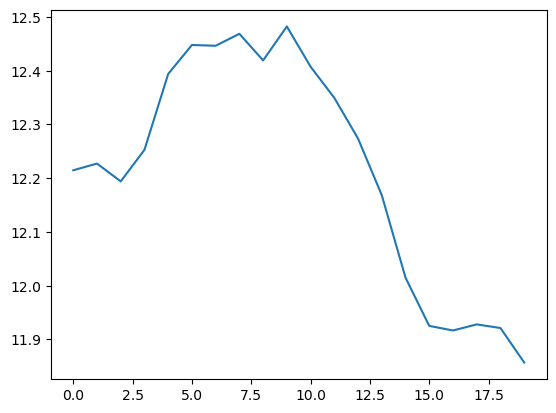

In [216]:
plt.plot(predictions)        # Plotting predictions visually

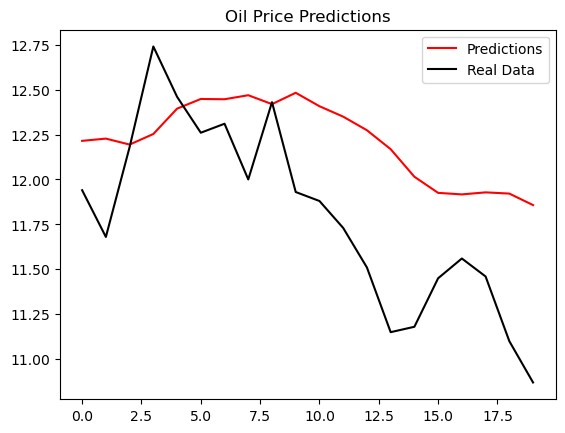

In [217]:
plt.plot(predictions, color = 'red', label = 'Predictions')        
plt.plot(testing_data, color = 'black', label = 'Real Data')

plt.title('Oil Price Predictions')

plt.legend()        # Plotting predictions vs real data for comparison

In [218]:
mse = mean_squared_error(testing_data, predictions)               # Calculcating mean squared error from test
rmse = np.sqrt(mse)
r2 = r2_score(testing_data, predictions)
mape = mean_absolute_percentage_error(testing_data, predictions)


print('Mean Squared Error:', mse) 
print('Root Mean Squared Error:', rmse)
print('R Squared:', r2)
print('Mean Absolute Percentage Error:', mape)                            

Mean Squared Error: 0.3198234452304937
Root Mean Squared Error: 0.5655293495747977
R Squared: -0.28588264358771753
Mean Absolute Percentage Error: 0.041739264408330444


# LSTM with forget gate bias

In [219]:
testing_data.shape    # Checking shape of testing_data for next model

(20,)

In [220]:
predictions.shape     # Checking shape of predictions

(20,)

In [221]:
testing_data = testing_data.reshape(-1, 1)     # Converting to 2D for normalisation

In [222]:
predictions # Checking predictions are de-noramlised

array([12.214781, 12.22724 , 12.194077, 12.252852, 12.393981, 12.447839,
       12.446364, 12.468672, 12.419155, 12.482259, 12.407458, 12.349413,
       12.273767, 12.168421, 12.014979, 11.925277, 11.916732, 11.928046,
       11.921331, 11.857213], dtype=float32)

In [223]:
testing_data      # Checking testing_data is de-normalised

array([[11.94],
       [11.68],
       [12.18],
       [12.74],
       [12.46],
       [12.26],
       [12.31],
       [12.  ],
       [12.43],
       [11.93],
       [11.88],
       [11.73],
       [11.51],
       [11.15],
       [11.18],
       [11.45],
       [11.56],
       [11.46],
       [11.1 ],
       [10.87]])

In [224]:
testing_data = scaler.transform(testing_data)         # renormalising testing_data for new variant

In [225]:
testing_data    # Checked and renormalised

array([[-2.208756  ],
       [-2.31027394],
       [-2.11504712],
       [-1.89639309],
       [-2.00572011],
       [-2.08381083],
       [-2.06428815],
       [-2.18532878],
       [-2.01743372],
       [-2.21266053],
       [-2.23218321],
       [-2.29075126],
       [-2.37665106],
       [-2.51721436],
       [-2.50550076],
       [-2.40007828],
       [-2.35712838],
       [-2.39617374],
       [-2.53673705],
       [-2.62654138]])

In [226]:
testing_data = testing_data.flatten()       # Converting testing_data to one dimension

In [227]:
testing_data.shape      # Confirming testing_data is now one-dimensional

(20,)

In [228]:
final_x_test_data       # Checking ginal_x_test_data is still normalised

array([[[-1.14281758],
        [-1.07644047],
        [-1.18967202],
        [-1.24433553],
        [-1.25604914],
        [-1.12719944],
        [-1.22481285],
        [-1.32242625],
        [-1.36537615],
        [-1.41223059],
        [-1.45127595],
        [-1.70507081],
        [-1.84563412],
        [-1.72459349],
        [-1.90029763],
        [-2.08381083],
        [-2.19313785],
        [-2.14237888],
        [-2.34151023],
        [-2.46255086]],

       [[-1.07644047],
        [-1.18967202],
        [-1.24433553],
        [-1.25604914],
        [-1.12719944],
        [-1.22481285],
        [-1.32242625],
        [-1.36537615],
        [-1.41223059],
        [-1.45127595],
        [-1.70507081],
        [-1.84563412],
        [-1.72459349],
        [-1.90029763],
        [-2.08381083],
        [-2.19313785],
        [-2.14237888],
        [-2.34151023],
        [-2.46255086],
        [-2.208756  ]],

       [[-1.18967202],
        [-1.24433553],
        [-1.25604914],
       

In [229]:
y_training_data       # Checking y_training_data is still normalised

array([-0.51418724, -0.58446889, -0.5532326 , ..., -2.14237888,
       -2.34151023, -2.46255086])

In [230]:
x_training_data      # Checking x_training_data is still normalised

array([[[ 0.13787032],
        [ 0.13787032],
        [-0.20182434],
        ...,
        [-0.44781012],
        [-0.57275528],
        [-0.58446889]],

       [[ 0.13787032],
        [-0.20182434],
        [ 0.11834764],
        ...,
        [-0.57275528],
        [-0.58446889],
        [-0.51418724]],

       [[-0.20182434],
        [ 0.11834764],
        [ 0.11834764],
        ...,
        [-0.58446889],
        [-0.51418724],
        [-0.58446889]],

       ...,

       [[-1.43565781],
        [-1.28338089],
        [-1.26385821],
        ...,
        [-1.90029763],
        [-2.08381083],
        [-2.19313785]],

       [[-1.28338089],
        [-1.26385821],
        [-1.14281758],
        ...,
        [-2.08381083],
        [-2.19313785],
        [-2.14237888]],

       [[-1.26385821],
        [-1.14281758],
        [-1.07644047],
        ...,
        [-2.19313785],
        [-2.14237888],
        [-2.34151023]]])

In [231]:
x_training_data.shape     # Checking shape of x_training_data

(2671, 20, 1)

In [232]:
y_training_data.shape     # Checking shape of y_training_data

(2671,)

In [233]:
final_x_test_data.shape   # Checking shape of final_x_test_data

(20, 20, 1)

In [234]:
testing_data.shape        # Checking shape of testing_data

(20,)

In [235]:
from tensorflow.keras.initializers import Constant       # Importing Constant for forget_bias

def build_rnn(units = 5, dropout_rate = 0.2, optimizer = 'adam', num_layers = 2, forget_bias = 1.0,
**kwargs):                                                                            # Added forget bias to default parameters
    rnn = Sequential()
    

    
    rnn.add(LSTM(units = units, return_sequences = True, input_shape = (20, 1),
                bias_initializer = Constant(forget_bias)))   # Initialises bias value and first lstm layer
    rnn.add(Dropout(dropout_rate))                           # Dropout to prevent overfitting
    
    for _ in range(num_layers -1):                                                    # Loop for adding layers with bias
        rnn.add(LSTM(units = units, return_sequences = True,
                    bias_initializer = Constant(forget_bias)))
        rnn.add(Dropout(dropout_rate))
    

    rnn.add(LSTM(units = units, bias_initializer = Constant(forget_bias)))            # Final lstm layer with bias
    rnn.add(Dropout(dropout_rate))
    
    rnn.add(Dense(units = 1))                                                         # Output layer
    
    rnn.compile(optimizer = optimizer, loss = 'mean_squared_error')                   # Hardcoding mean squared error
    return rnn

In [236]:
model = KerasRegressor(model = build_rnn, forget_bias = 1.0, verbose = 1)      

# To use keras model as scikit-learn model for cross validation with initial forget_bias set

In [237]:
param_distributions = {                                           # Defining the hyperparameter space for a randomized search
    'model__units': randint(5, 50),
    'model__dropout_rate': uniform(0.1, 0.5),
    'batch_size': [16, 32, 64],
    'epochs': [10, 20, 30],
    'model__optimizer': ['adam', 'rmsprop'],
    'model__num_layers': [1, 2, 3, 4],
    'model__forget_bias': uniform(0.5, 2.0)                       # Added in the forget gate bias to the searchable space
}

In [238]:
tscv = TimeSeriesSplit(n_splits = 5)           # Timeseries split to maintain temporal nature of data for validation  

In [239]:
random_search = RandomizedSearchCV(estimator = model,                  # Using RandomizedSearchCV for cross validation
                                  param_distributions = param_distributions,
                                  n_iter = 10,
                                  cv = tscv,
                                  verbose = 2,
                                  n_jobs = -1)

In [240]:
testing_data.shape   # Checking testing_data shape before fitting the random_search

(20,)

In [241]:
testing_data = np.array(testing_data).reshape(-1)           # Change to 1D for regressor

testing_data.shape

(20,)

In [242]:
final_x_test_data.shape  # Checking shape of final_x_test_data for calculating test_loss

(20, 20, 1)

In [243]:
random_search.fit(x_training_data, y_training_data)              # Fitting the RandomizedSearch

best_model = random_search.best_estimator_                       # Finding best model 
best_params = random_search.best_params_                         # Finding best params 

print('Best parameters:', best_params)

test_loss = best_model.score(final_x_test_data, testing_data)    # Calculating the test_loss

print(f"Test Loss: {test_loss}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\paddy\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.4919
Epoch 2/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1098
Epoch 3/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0746
Epoch 4/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0635
Epoch 5/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0515
Epoch 6/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0403
Epoch 7/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0423
Epoch 8/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0363
Epoch 9/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0341
Epoch 10/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0364
Epoch 11/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0329
Epoch 12/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0325
Epoch 13/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0294
Epoch 14/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0300
Epoch 15/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - lo

In [244]:
print(test_loss)      # Printing thest test_loss

0.5302440989036574


In [245]:
final_x_test_data     # Checking final_x_test_data is still normalised before making predictions

array([[[-1.14281758],
        [-1.07644047],
        [-1.18967202],
        [-1.24433553],
        [-1.25604914],
        [-1.12719944],
        [-1.22481285],
        [-1.32242625],
        [-1.36537615],
        [-1.41223059],
        [-1.45127595],
        [-1.70507081],
        [-1.84563412],
        [-1.72459349],
        [-1.90029763],
        [-2.08381083],
        [-2.19313785],
        [-2.14237888],
        [-2.34151023],
        [-2.46255086]],

       [[-1.07644047],
        [-1.18967202],
        [-1.24433553],
        [-1.25604914],
        [-1.12719944],
        [-1.22481285],
        [-1.32242625],
        [-1.36537615],
        [-1.41223059],
        [-1.45127595],
        [-1.70507081],
        [-1.84563412],
        [-1.72459349],
        [-1.90029763],
        [-2.08381083],
        [-2.19313785],
        [-2.14237888],
        [-2.34151023],
        [-2.46255086],
        [-2.208756  ]],

       [[-1.18967202],
        [-1.24433553],
        [-1.25604914],
       

In [246]:
predictions = best_model.predict(final_x_test_data)       # Making predictions

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [247]:
print(predictions)    # Checking predictions are normalised

[-2.4372995 -2.316852  -2.3574722 -2.2393315 -2.0572107 -2.0978742
 -2.1521387 -2.148353  -2.2299998 -2.1323752 -2.245788  -2.2805183
 -2.3274903 -2.3911989 -2.4847887 -2.506426  -2.4601455 -2.4265616
 -2.43871   -2.5144725]


In [248]:
predictions = predictions.reshape(-1, 1)       # Reshaping predictions for inverse_transform

In [249]:
predictions = scaler.inverse_transform(predictions)      # De-normalising predictions

In [250]:
print(predictions)     # Verifying predictions have been de-normalised

[[11.3546715]
 [11.663153 ]
 [11.559119 ]
 [11.861692 ]
 [12.328126 ]
 [12.223982 ]
 [12.085004 ]
 [12.094699 ]
 [11.8855915]
 [12.13562  ]
 [11.845156 ]
 [11.756207 ]
 [11.635906 ]
 [11.472741 ]
 [11.233047 ]
 [11.177629 ]
 [11.296161 ]
 [11.382173 ]
 [11.351059 ]
 [11.157022 ]]


In [251]:
testing_data = testing_data.reshape(-1, 1)                 # Reshaping testing_data to de-normalise
testing_data = scaler.inverse_transform(testing_data)      # De-normalising the testing data

In [252]:
print(testing_data)     # Verifying testing_data is de-normalised

[[11.94]
 [11.68]
 [12.18]
 [12.74]
 [12.46]
 [12.26]
 [12.31]
 [12.  ]
 [12.43]
 [11.93]
 [11.88]
 [11.73]
 [11.51]
 [11.15]
 [11.18]
 [11.45]
 [11.56]
 [11.46]
 [11.1 ]
 [10.87]]


In [253]:
predictions = predictions.flatten()       
testing_data = testing_data.flatten()         # Making predictions and testing_data one dimensional

In [254]:
print(predictions)      # Verifying the shape change of predictions

[11.3546715 11.663153  11.559119  11.861692  12.328126  12.223982
 12.085004  12.094699  11.8855915 12.13562   11.845156  11.756207
 11.635906  11.472741  11.233047  11.177629  11.296161  11.382173
 11.351059  11.157022 ]


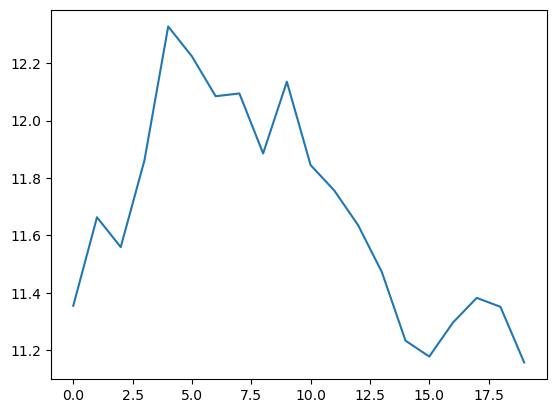

In [255]:
plt.plot(predictions)       # Plotting the predictions visually

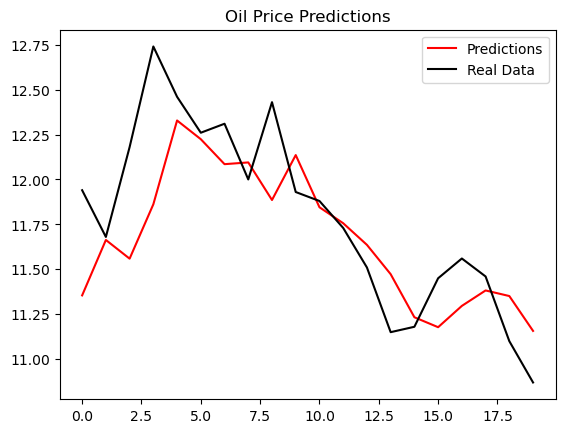

In [256]:
plt.plot(predictions, color = 'red', label = 'Predictions')        
plt.plot(testing_data, color = 'black', label = 'Real Data')

plt.title('Oil Price Predictions')

plt.legend()          # Comparing predictions to the real data for performance evaluation

In [257]:
mse = mean_squared_error(testing_data, predictions)               # Calculcating mean squared error from test
rmse = np.sqrt(mse)
r2 = r2_score(testing_data, predictions)
mape = mean_absolute_percentage_error(testing_data, predictions)


print('Mean Squared Error:', mse) 
print('Root Mean Squared Error:', rmse)
print('R Squared:', r2)
print('Mean Absolute Percentage Error:', mape)                              

Mean Squared Error: 0.11683727451876647
Root Mean Squared Error: 0.34181467861805825
R Squared: 0.5302438715226163
Mean Absolute Percentage Error: 0.021166360661771473


# LSTM with Attention Mechanism & Forget Gate Bias

In [258]:
testing_data.shape     # Checking testing_data shape for new model

(20,)

In [259]:
predictions.shape     # Checking predictions shape

(20,)

In [260]:
testing_data = testing_data.reshape(-1, 1)     # Converting to testing_data tp 2D for normalisation

In [261]:
predictions   # Checking predictions still de-normalised

array([11.3546715, 11.663153 , 11.559119 , 11.861692 , 12.328126 ,
       12.223982 , 12.085004 , 12.094699 , 11.8855915, 12.13562  ,
       11.845156 , 11.756207 , 11.635906 , 11.472741 , 11.233047 ,
       11.177629 , 11.296161 , 11.382173 , 11.351059 , 11.157022 ],
      dtype=float32)

In [262]:
testing_data  # Checking testing_data still de-normalised

array([[11.94],
       [11.68],
       [12.18],
       [12.74],
       [12.46],
       [12.26],
       [12.31],
       [12.  ],
       [12.43],
       [11.93],
       [11.88],
       [11.73],
       [11.51],
       [11.15],
       [11.18],
       [11.45],
       [11.56],
       [11.46],
       [11.1 ],
       [10.87]])

In [263]:
testing_data = scaler.transform(testing_data)         # Re-normalising testing_data for new variant

In [264]:
testing_data    # Checked and renormalised

array([[-2.208756  ],
       [-2.31027394],
       [-2.11504712],
       [-1.89639309],
       [-2.00572011],
       [-2.08381083],
       [-2.06428815],
       [-2.18532878],
       [-2.01743372],
       [-2.21266053],
       [-2.23218321],
       [-2.29075126],
       [-2.37665106],
       [-2.51721436],
       [-2.50550076],
       [-2.40007828],
       [-2.35712838],
       [-2.39617374],
       [-2.53673705],
       [-2.62654138]])

In [265]:
testing_data = testing_data.flatten()   # Changing testing_data to one dimensional

In [266]:
testing_data.shape                      # Checking new shape of testing_data is 1D

(20,)

In [267]:
final_x_test_data       # Checking final_x_test_data is still normalised

array([[[-1.14281758],
        [-1.07644047],
        [-1.18967202],
        [-1.24433553],
        [-1.25604914],
        [-1.12719944],
        [-1.22481285],
        [-1.32242625],
        [-1.36537615],
        [-1.41223059],
        [-1.45127595],
        [-1.70507081],
        [-1.84563412],
        [-1.72459349],
        [-1.90029763],
        [-2.08381083],
        [-2.19313785],
        [-2.14237888],
        [-2.34151023],
        [-2.46255086]],

       [[-1.07644047],
        [-1.18967202],
        [-1.24433553],
        [-1.25604914],
        [-1.12719944],
        [-1.22481285],
        [-1.32242625],
        [-1.36537615],
        [-1.41223059],
        [-1.45127595],
        [-1.70507081],
        [-1.84563412],
        [-1.72459349],
        [-1.90029763],
        [-2.08381083],
        [-2.19313785],
        [-2.14237888],
        [-2.34151023],
        [-2.46255086],
        [-2.208756  ]],

       [[-1.18967202],
        [-1.24433553],
        [-1.25604914],
       

In [268]:
y_training_data   # Checking y_training_data is still normalised

array([-0.51418724, -0.58446889, -0.5532326 , ..., -2.14237888,
       -2.34151023, -2.46255086])

In [269]:
x_training_data   # Checking x_training_data is still normalised

array([[[ 0.13787032],
        [ 0.13787032],
        [-0.20182434],
        ...,
        [-0.44781012],
        [-0.57275528],
        [-0.58446889]],

       [[ 0.13787032],
        [-0.20182434],
        [ 0.11834764],
        ...,
        [-0.57275528],
        [-0.58446889],
        [-0.51418724]],

       [[-0.20182434],
        [ 0.11834764],
        [ 0.11834764],
        ...,
        [-0.58446889],
        [-0.51418724],
        [-0.58446889]],

       ...,

       [[-1.43565781],
        [-1.28338089],
        [-1.26385821],
        ...,
        [-1.90029763],
        [-2.08381083],
        [-2.19313785]],

       [[-1.28338089],
        [-1.26385821],
        [-1.14281758],
        ...,
        [-2.08381083],
        [-2.19313785],
        [-2.14237888]],

       [[-1.26385821],
        [-1.14281758],
        [-1.07644047],
        ...,
        [-2.19313785],
        [-2.14237888],
        [-2.34151023]]])

In [270]:
x_training_data.shape       # Checking shape of x_training_data

(2671, 20, 1)

In [271]:
y_training_data.shape       # Checking shape of y_training_data

(2671,)

In [272]:
final_x_test_data.shape     # Checking shape of final_x_test_data

(20, 20, 1)

In [273]:
testing_data.shape         # Checking shape of testing_data

(20,)

In [274]:
#!pip install tfa-nightly

In [275]:
def build_rnn(units = 5, dropout_rate = 0.2, optimizer = 'adam', num_layers = 2, forget_bias = 1.0,
**kwargs):                                             # Defines default parameters with forget_bias
   
    inputs = Input(shape = (20, 1))                    # Added the input layer


    x = LSTM(units = units, return_sequences = True, bias_initializer = Constant(forget_bias))(inputs)
    x = Dropout(dropout_rate)(x)             # First LSTM layer with bias initialised as constant value
    
    for _ in range(num_layers -1):                                                    # Loop for adding layers
        x = LSTM(units = units, return_sequences = True, bias_initializer = Constant(forget_bias))(x)
        x = Dropout(dropout_rate)(x)         # Adding another LSTM layer with bias and dropout layer
        
    attention = Attention()([x, x])          # Adds attention mechanism to help model focus on important parts of input
    
    x = LSTM(units = units, bias_initializer = Constant(forget_bias))(attention)   # Final layer with bias
    x = Dropout(dropout_rate)(x)
    outputs = Dense(units = 1)(x)            # Output layer added
    
    rnn = Model(inputs = inputs, outputs = outputs) # Create the RNN with specified inputs and outputs
    
    rnn.compile(optimizer = optimizer, loss = 'mean_squared_error')                  # Hardcoding mean squared error
    return rnn

In [276]:
model = KerasRegressor(model = build_rnn, forget_bias = 1.0, verbose = 1)      

# To use keras model as scikit-learn model for cross validation with forget_bias initial value of 1.0

In [277]:
param_distributions = {                                           # Defining the hyperparameter space for a randomized search
    'model__units': randint(5, 50),
    'model__dropout_rate': uniform(0.1, 0.5),
    'batch_size': [16, 32, 64],
    'epochs': [10, 20, 30],
    'model__optimizer': ['adam', 'rmsprop'],
    'model__num_layers': [1, 2, 3, 4],
    'model__forget_bias': uniform(0.5, 2.0)                       # Added in the forget gate bias to the searchable space
}

In [278]:
tscv = TimeSeriesSplit(n_splits = 5)           # Timeseries split to maintain temporal nature of data for validation  

In [279]:
random_search = RandomizedSearchCV(estimator = model,                  # Using RandomizedSearchCV for cross validation
                                  param_distributions = param_distributions,
                                  n_iter = 10,
                                  cv = tscv,
                                  verbose = 2,
                                  n_jobs = -1)

In [280]:
testing_data.shape    # Checking shape of testing_data

(20,)

In [281]:
testing_data = np.array(testing_data).reshape(-1)           # Change to 1D for regressor

testing_data.shape                                          # Verifying is now one dimensional

(20,)

In [282]:
final_x_test_data.shape      # Checking shape of final_x_test_data for test_loss calculation

(20, 20, 1)

In [283]:
random_search.fit(x_training_data, y_training_data)              # Fitting the RandomizedSearch

best_model = random_search.best_estimator_                       # Finding best model 
best_params = random_search.best_params_                         # Finding best params 

print('Best parameters:', best_params)

test_loss = best_model.score(final_x_test_data, testing_data)    # Calculating the test_loss for the training model

print(f"Test Loss: {test_loss}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Epoch 1/30
167/167 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 2.5859
Epoch 2/30
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.3644
Epoch 3/30
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1630
Epoch 4/30
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1350
Epoch 5/30
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0988
Epoch 6/30
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0866
Epoch 7/30
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0816
Epoch 8/30
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0750
Epoch 9/30
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0798
Epoch 10/30
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0672
Epoch 11/30
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0694
Epoch 12/30
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0682
Epoch 13/30
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0647
Epoch 14/30
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0

In [284]:
print(test_loss)       # Printing the training test_loss

-0.23345800213627022


In [285]:
final_x_test_data      # Checking final_x_test_data is still normalised for predictions

array([[[-1.14281758],
        [-1.07644047],
        [-1.18967202],
        [-1.24433553],
        [-1.25604914],
        [-1.12719944],
        [-1.22481285],
        [-1.32242625],
        [-1.36537615],
        [-1.41223059],
        [-1.45127595],
        [-1.70507081],
        [-1.84563412],
        [-1.72459349],
        [-1.90029763],
        [-2.08381083],
        [-2.19313785],
        [-2.14237888],
        [-2.34151023],
        [-2.46255086]],

       [[-1.07644047],
        [-1.18967202],
        [-1.24433553],
        [-1.25604914],
        [-1.12719944],
        [-1.22481285],
        [-1.32242625],
        [-1.36537615],
        [-1.41223059],
        [-1.45127595],
        [-1.70507081],
        [-1.84563412],
        [-1.72459349],
        [-1.90029763],
        [-2.08381083],
        [-2.19313785],
        [-2.14237888],
        [-2.34151023],
        [-2.46255086],
        [-2.208756  ]],

       [[-1.18967202],
        [-1.24433553],
        [-1.25604914],
       

In [286]:
predictions = best_model.predict(final_x_test_data)      # Making predictions

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [287]:
print(predictions)        # Print predictions, still normalised

[-2.0467565 -2.063007  -2.090045  -2.0917861 -2.0811849 -2.0823271
 -2.0902438 -2.0955598 -2.1071477 -2.105602  -2.1168516 -2.1253157
 -2.1347835 -2.1458642 -2.164933  -2.178553  -2.181831  -2.1833436
 -2.189759  -2.206146 ]


In [288]:
predictions = predictions.reshape(-1, 1)    # Reshaping predictions for inverse_transform

In [289]:
predictions = scaler.inverse_transform(predictions)  # De-normalising the predictions for readability

In [290]:
print(predictions)      # Checking predictions are now de-normalised

[[12.3549  ]
 [12.313281]
 [12.244034]
 [12.239574]
 [12.266726]
 [12.2638  ]
 [12.243525]
 [12.229909]
 [12.200232]
 [12.20419 ]
 [12.175379]
 [12.153701]
 [12.129453]
 [12.101073]
 [12.052236]
 [12.017353]
 [12.008959]
 [12.005084]
 [11.988653]
 [11.946684]]


In [291]:
testing_data = testing_data.reshape(-1, 1)                 # Reshaping the testing_data for inverse_transform
testing_data = scaler.inverse_transform(testing_data)      # De-normalising the testing data

In [292]:
print(testing_data)   # Confirming testing_data de-normalised for metric calculation

[[11.94]
 [11.68]
 [12.18]
 [12.74]
 [12.46]
 [12.26]
 [12.31]
 [12.  ]
 [12.43]
 [11.93]
 [11.88]
 [11.73]
 [11.51]
 [11.15]
 [11.18]
 [11.45]
 [11.56]
 [11.46]
 [11.1 ]
 [10.87]]


In [293]:
predictions = predictions.flatten()
testing_data = testing_data.flatten()     # Converting predictions and testing_data to one dimension

In [294]:
print(predictions)      # Checking new shape of predictions

[12.3549   12.313281 12.244034 12.239574 12.266726 12.2638   12.243525
 12.229909 12.200232 12.20419  12.175379 12.153701 12.129453 12.101073
 12.052236 12.017353 12.008959 12.005084 11.988653 11.946684]


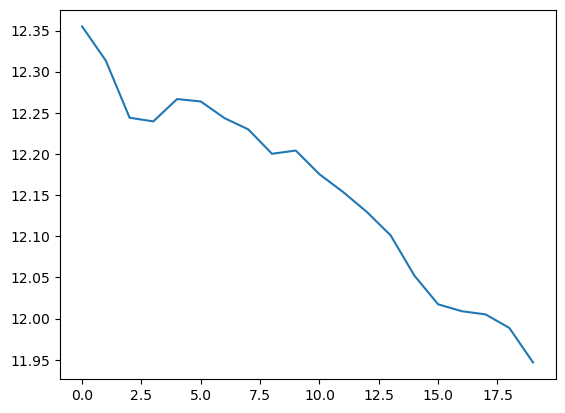

In [295]:
plt.plot(predictions)   # Plotting predictions visually

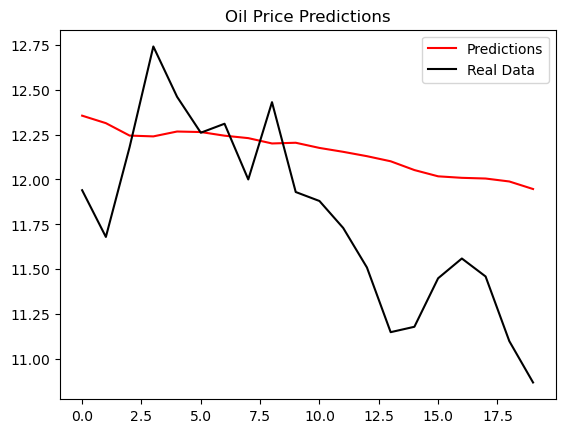

In [296]:
plt.plot(predictions, color = 'red', label = 'Predictions')        
plt.plot(testing_data, color = 'black', label = 'Real Data')

plt.title('Oil Price Predictions')

plt.legend()                  # Comparing predictions to real data for performance evaluation

In [297]:
mse = mean_squared_error(testing_data, predictions)               # Calculcating mean squared error from test
rmse = np.sqrt(mse)
r2 = r2_score(testing_data, predictions)
mape = mean_absolute_percentage_error(testing_data, predictions)


print('Mean Squared Error:', mse) 
print('Root Mean Squared Error:', rmse)
print('R Squared:', r2)
print('Mean Absolute Percentage Error:', mape) 

Mean Squared Error: 0.3067842226435229
Root Mean Squared Error: 0.5538810545988397
R Squared: -0.2334571248819861
Mean Absolute Percentage Error: 0.040426731918713675


# Bidirectional LSTM

In [298]:
testing_data.shape    # Checking shape of testing_data for new model

(20,)

In [299]:
predictions.shape     # Checking shape of predictions

(20,)

In [300]:
testing_data = testing_data.reshape(-1, 1)     # Converting to 2D for normalisation

In [301]:
predictions # Checking predictions are still de-normalised

array([12.3549  , 12.313281, 12.244034, 12.239574, 12.266726, 12.2638  ,
       12.243525, 12.229909, 12.200232, 12.20419 , 12.175379, 12.153701,
       12.129453, 12.101073, 12.052236, 12.017353, 12.008959, 12.005084,
       11.988653, 11.946684], dtype=float32)

In [302]:
testing_data   # Checking shape of testing_data and still de-normalised

array([[11.94],
       [11.68],
       [12.18],
       [12.74],
       [12.46],
       [12.26],
       [12.31],
       [12.  ],
       [12.43],
       [11.93],
       [11.88],
       [11.73],
       [11.51],
       [11.15],
       [11.18],
       [11.45],
       [11.56],
       [11.46],
       [11.1 ],
       [10.87]])

In [303]:
testing_data = scaler.transform(testing_data)         # Re-normalising testing_data for new variant

In [304]:
testing_data                                          # Checked and re-normalised

array([[-2.208756  ],
       [-2.31027394],
       [-2.11504712],
       [-1.89639309],
       [-2.00572011],
       [-2.08381083],
       [-2.06428815],
       [-2.18532878],
       [-2.01743372],
       [-2.21266053],
       [-2.23218321],
       [-2.29075126],
       [-2.37665106],
       [-2.51721436],
       [-2.50550076],
       [-2.40007828],
       [-2.35712838],
       [-2.39617374],
       [-2.53673705],
       [-2.62654138]])

In [305]:
testing_data = testing_data.flatten()     # Converted testing_data to one dimension

In [306]:
testing_data.shape                        # Checking new shape of testing_data

(20,)

In [307]:
final_x_test_data     # Checking final_x_test_data is still normalised

array([[[-1.14281758],
        [-1.07644047],
        [-1.18967202],
        [-1.24433553],
        [-1.25604914],
        [-1.12719944],
        [-1.22481285],
        [-1.32242625],
        [-1.36537615],
        [-1.41223059],
        [-1.45127595],
        [-1.70507081],
        [-1.84563412],
        [-1.72459349],
        [-1.90029763],
        [-2.08381083],
        [-2.19313785],
        [-2.14237888],
        [-2.34151023],
        [-2.46255086]],

       [[-1.07644047],
        [-1.18967202],
        [-1.24433553],
        [-1.25604914],
        [-1.12719944],
        [-1.22481285],
        [-1.32242625],
        [-1.36537615],
        [-1.41223059],
        [-1.45127595],
        [-1.70507081],
        [-1.84563412],
        [-1.72459349],
        [-1.90029763],
        [-2.08381083],
        [-2.19313785],
        [-2.14237888],
        [-2.34151023],
        [-2.46255086],
        [-2.208756  ]],

       [[-1.18967202],
        [-1.24433553],
        [-1.25604914],
       

In [308]:
y_training_data        # Checking y_training_data is still normalised

array([-0.51418724, -0.58446889, -0.5532326 , ..., -2.14237888,
       -2.34151023, -2.46255086])

In [309]:
x_training_data        # Checking x_training_data is still normalised

array([[[ 0.13787032],
        [ 0.13787032],
        [-0.20182434],
        ...,
        [-0.44781012],
        [-0.57275528],
        [-0.58446889]],

       [[ 0.13787032],
        [-0.20182434],
        [ 0.11834764],
        ...,
        [-0.57275528],
        [-0.58446889],
        [-0.51418724]],

       [[-0.20182434],
        [ 0.11834764],
        [ 0.11834764],
        ...,
        [-0.58446889],
        [-0.51418724],
        [-0.58446889]],

       ...,

       [[-1.43565781],
        [-1.28338089],
        [-1.26385821],
        ...,
        [-1.90029763],
        [-2.08381083],
        [-2.19313785]],

       [[-1.28338089],
        [-1.26385821],
        [-1.14281758],
        ...,
        [-2.08381083],
        [-2.19313785],
        [-2.14237888]],

       [[-1.26385821],
        [-1.14281758],
        [-1.07644047],
        ...,
        [-2.19313785],
        [-2.14237888],
        [-2.34151023]]])

In [310]:
x_training_data.shape       # Checking shape of x_training_data

(2671, 20, 1)

In [311]:
y_training_data.shape       # Checking shape of y_training_data

(2671,)

In [312]:
final_x_test_data.shape    # Checking shape of final_x_test_data

(20, 20, 1)

In [313]:
testing_data.shape         # Checking shape of testing_data

(20,)

In [314]:
from tensorflow.keras.layers import Bidirectional    # Importing the Bidirectional wrapper for processing forward + backward

def build_rnn(units = 5, dropout_rate = 0.2, optimizer = 'adam', num_layers = 2):     # Defining default parameters
    rnn = Sequential()
    

    
    rnn.add(Bidirectional(LSTM(units = units, return_sequences = True), input_shape = (20, 1)))
    rnn.add(Dropout(dropout_rate))                      # Adding Bidirectional LSTM layer, input shape and dropout rate
    
    for _ in range(num_layers -1):                                                    # Loop for adding layers
        rnn.add(Bidirectional(LSTM(units = units, return_sequences = True)))             
        rnn.add(Dropout(dropout_rate))                  # Adding another Bidirectional and dropout layer
    

    rnn.add(Bidirectional(LSTM(units = units)))         # Adding a final Bidirectional and dropout layer
    rnn.add(Dropout(dropout_rate))
    
    rnn.add(Dense(units = 1))                           # Output layer
    
    rnn.compile(optimizer = optimizer, loss = 'mean_squared_error')                   # Hardcoding mean squared error
    return rnn


In [315]:
model = KerasRegressor(build_fn = build_rnn, verbose = 1)      # To use keras model as scikit-learn model for cross validation

In [316]:
param_distributions = {                                           # Defining the hyperparameter space for a randomized search
    'model__units': randint(5, 50),
    'model__dropout_rate': uniform(0.1, 0.5),
    'batch_size': [16, 32, 64],
    'epochs': [10, 20, 30],
    'model__optimizer': ['adam', 'rmsprop'],
    'model__num_layers': [1, 2, 3, 4]
}

In [317]:
tscv = TimeSeriesSplit(n_splits = 5)           # Timeseries split to maintain temporal nature of data for validation    

In [318]:
random_search = RandomizedSearchCV(estimator = model,             # Using RandomizedSearchCV for cross validation
                                  param_distributions = param_distributions,
                                  n_iter = 10,
                                  cv = tscv,
                                  verbose = 2,
                                  n_jobs = -1)


In [319]:
testing_data.shape  # Checking shape of testing_data before fitting random_search

(20,)

In [320]:
testing_data = np.array(testing_data).reshape(-1)           # Changing testing_data to 1D for regressor

testing_data.shape                                          # Verifying testing_data is one dimensional

(20,)

In [321]:
final_x_test_data.shape      # Checking the shape of final_x_test_data for test_loss calculation

(20, 20, 1)

In [323]:
random_search.fit(x_training_data, y_training_data)              # Fitting the RandomizedSearch

best_model = random_search.best_estimator_                       # Finding best model 
best_params = random_search.best_params_                         # Finding best params 

print('Best parameters:', best_params)

test_loss = best_model.score(final_x_test_data, testing_data)    # Calculating the test_loss

print(f"Test Loss: {test_loss}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\paddy\anaconda3\lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\paddy\anaconda3\lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - loss: 0.1910
Epoch 2/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0691
Epoch 3/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0652
Epoch 4/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0588
Epoch 5/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0632
Epoch 6/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0512
Epoch 7/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0484
Epoch 8/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0470
Epoch 9/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0536
Epoch 10/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0462
Best parameters: {'batch_size': 16, 'epochs': 10, 'model__dropout_rate': 0.35006404563047866, 'model__num_layers': 3, 'model__optimizer': 'adam', 'model__units': 41}
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 821ms/step
Test Loss: 0.480936803447644


In [324]:
print(test_loss)     # Printing the test_loss

0.480936803447644


In [325]:
predictions = best_model.predict(final_x_test_data)     # Making predictions using final_x_test_data

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


In [326]:
print(testing_data)                                     # Checking testing_data is still normalised

[-2.208756   -2.31027394 -2.11504712 -1.89639309 -2.00572011 -2.08381083
 -2.06428815 -2.18532878 -2.01743372 -2.21266053 -2.23218321 -2.29075126
 -2.37665106 -2.51721436 -2.50550076 -2.40007828 -2.35712838 -2.39617374
 -2.53673705 -2.62654138]


In [327]:
print(predictions)                                     # Checking predictions is still normalised

[-2.2995927 -2.280556  -2.27669   -2.2209654 -2.108877  -2.059232
 -2.0702348 -2.0884094 -2.1430676 -2.1306665 -2.1710536 -2.2079926
 -2.246427  -2.291639  -2.3541005 -2.3891506 -2.379008  -2.351312
 -2.3384254 -2.3685505]


In [328]:
predictions = predictions.reshape(-1, 1)              # Reshaping predictions for inverse_transform

In [329]:
predictions = scaler.inverse_transform(predictions)   # De-normalising predictions for readability


In [330]:
testing_data = testing_data.reshape(-1, 1)            # Reshaping testing_data for inverse_transform
testing_data = scaler.inverse_transform(testing_data) # De-normalising the testing data

In [331]:
print(testing_data)     # Verifying testing_data is de-normalised

[[11.94]
 [11.68]
 [12.18]
 [12.74]
 [12.46]
 [12.26]
 [12.31]
 [12.  ]
 [12.43]
 [11.93]
 [11.88]
 [11.73]
 [11.51]
 [11.15]
 [11.18]
 [11.45]
 [11.56]
 [11.46]
 [11.1 ]
 [10.87]]


In [332]:
predictions = predictions.flatten()            # Changing predictions to one dimensional

In [333]:
testing_data = testing_data.flatten()          # Changing testing_data to one dimensional

In [334]:
print(predictions)                             # Verifying the shape and de-normalisation of predictions

[11.7073555 11.756111  11.766012  11.9087305 12.195803  12.322949
 12.29477   12.248222  12.108236  12.139997  12.03656   11.941956
 11.843519  11.727726  11.567755  11.477987  11.503963  11.574897
 11.607901  11.530746 ]


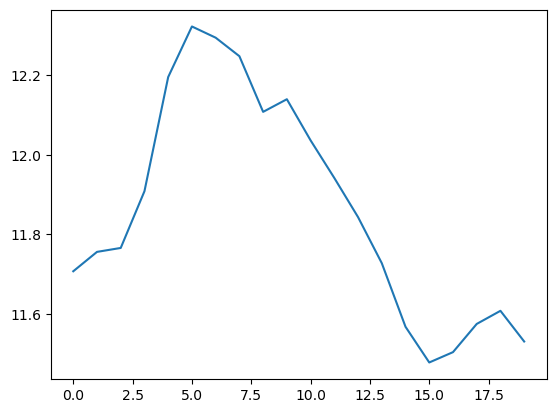

In [335]:
plt.plot(predictions)                          # Plotting predictions for visual observation

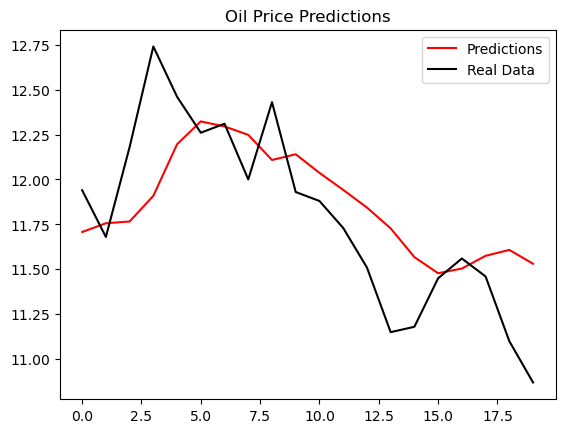

In [336]:
plt.plot(predictions, color = 'red', label = 'Predictions')        
plt.plot(testing_data, color = 'black', label = 'Real Data')

plt.title('Oil Price Predictions')

plt.legend()                                  # Plotting predictions vs real data for performance assessment

In [337]:
mse = mean_squared_error(testing_data, predictions)               # Calculcating mean squared error from test
rmse = np.sqrt(mse)
r2 = r2_score(testing_data, predictions)
mape = mean_absolute_percentage_error(testing_data, predictions)


print('Mean Squared Error:', mse) 
print('Root Mean Squared Error:', rmse)
print('R Squared:', r2)
print('Mean Absolute Percentage Error:', mape)                             

Mean Squared Error: 0.1291008350299893
Root Mean Squared Error: 0.35930604647012176
R Squared: 0.48093698097053605
Mean Absolute Percentage Error: 0.02437849063093036
